In [14]:
%%capture
from xai_gradient_importance import *

In [15]:
# 1. data
# load data
train_images, train_labels, test_images, test_labels = mnist_data()
samples, sample_labels = sample_and_categorize(train_images, train_labels, number=3000)
print(samples.shape)
print(sample_labels.shape)

# reshape data
x_train = np.reshape(samples, (-1, 784))
# x_train = np.reshape(train_images, (-1, 784))
print(x_train.shape)

(3000, 28, 28, 1)
(3000,)
(3000, 784)


In [19]:
vae = VAE.load("trained_models/VAE")
cnn = load_model("trained_models/CNN/classifier.h5")
xai = xai_model(vae.decoder, cnn, input_shape=(12,))
xai.summary()

Model: "xai"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 12)]              0         
_________________________________________________________________
decoder (Sequential)         (None, 784)               408848    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
sequential (Sequential)      (None, 10)                1199882   
Total params: 1,608,730
Trainable params: 1,608,730
Non-trainable params: 0
_________________________________________________________________


In [20]:
x_samples = np.reshape(samples, (-1, 784))
encodings_samples = vae.encoder.predict(x_samples)
sample_labels_onehot = tf.one_hot(tf.constant(sample_labels), depth=10).numpy()

2024-03-08 13:36:54.354553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


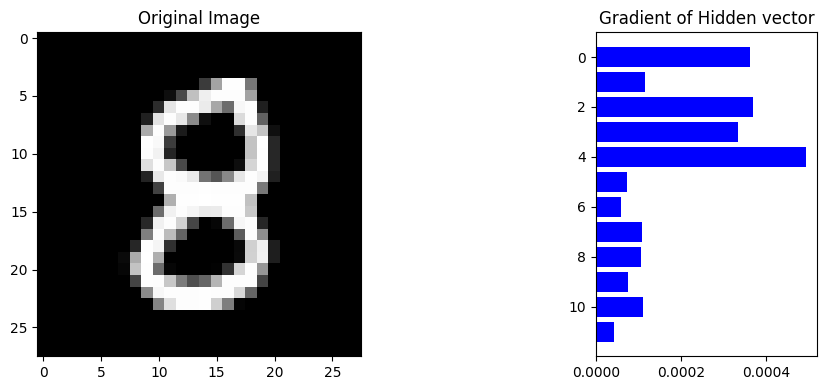

2024-03-08 13:37:00.333886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-03-08 13:37:00.392079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


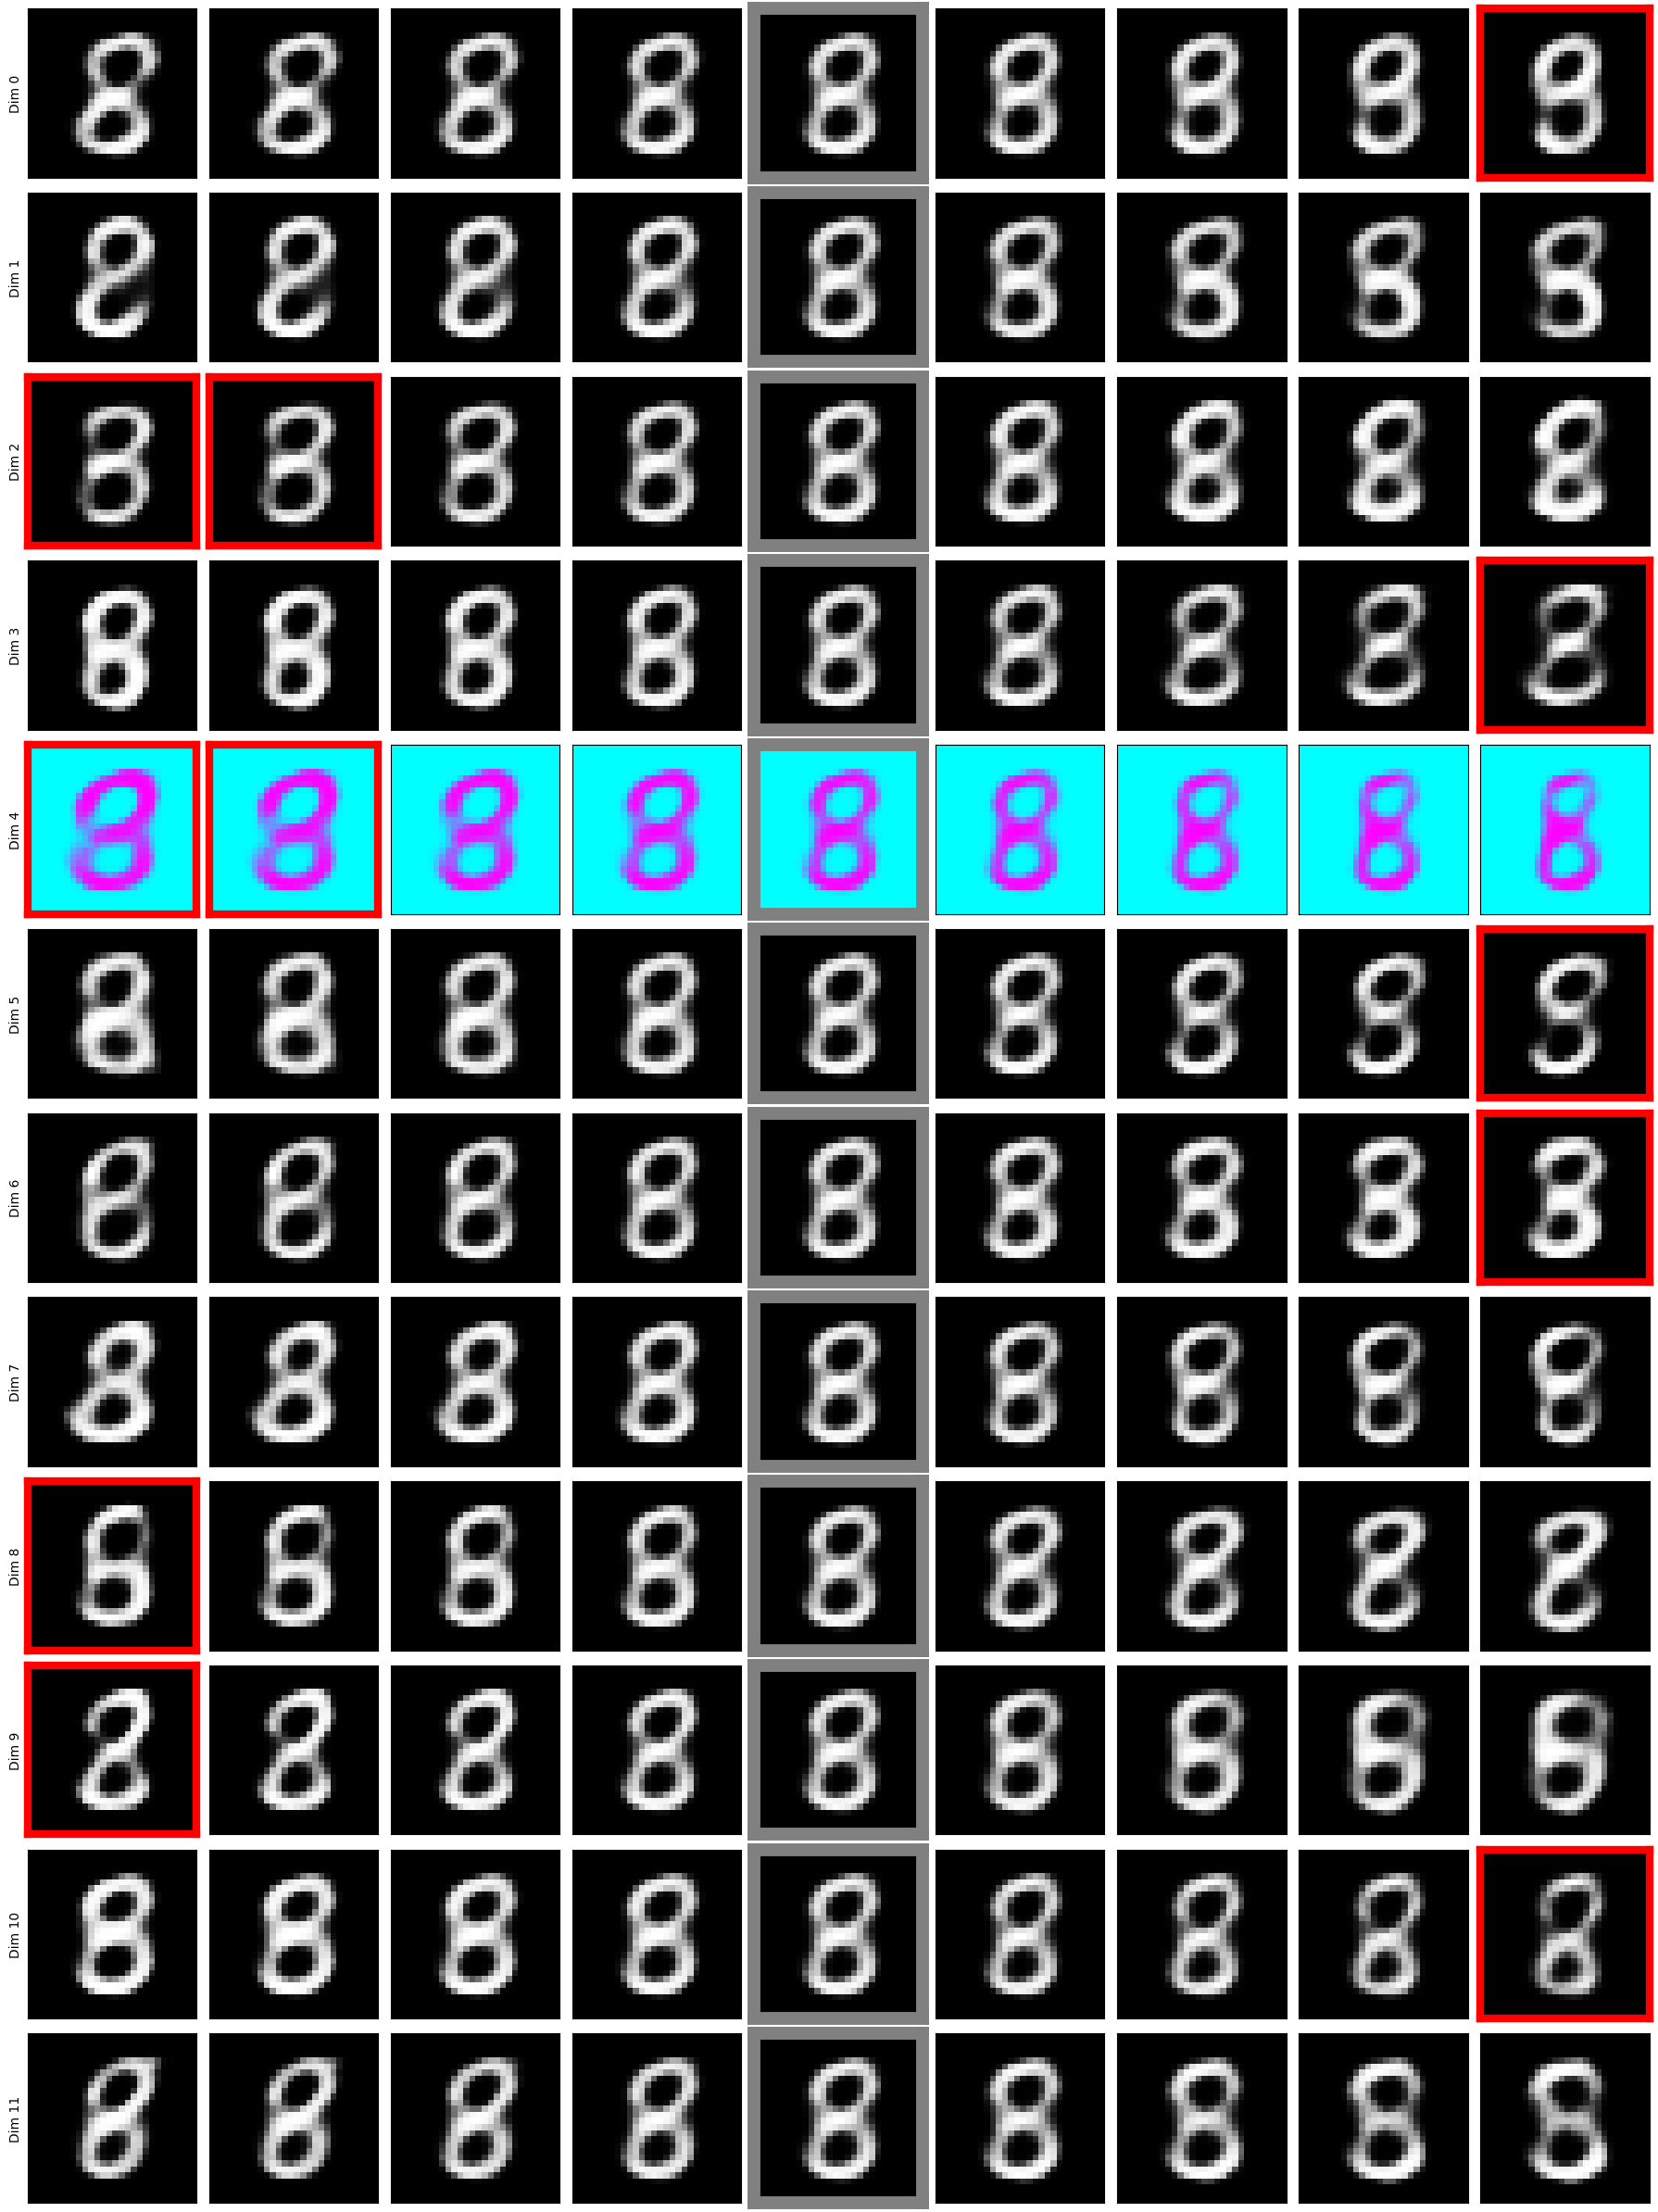

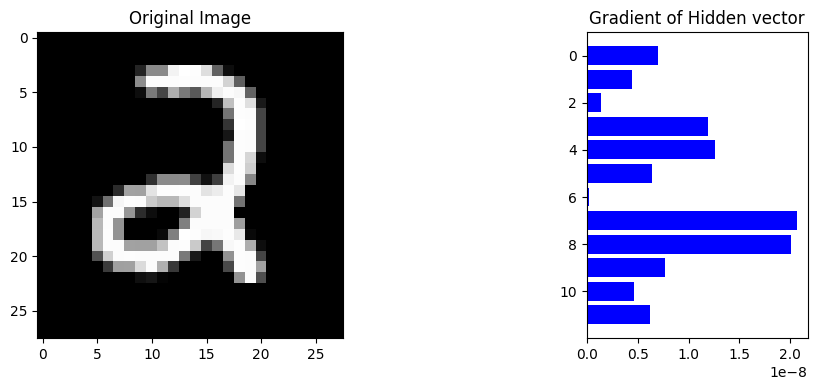

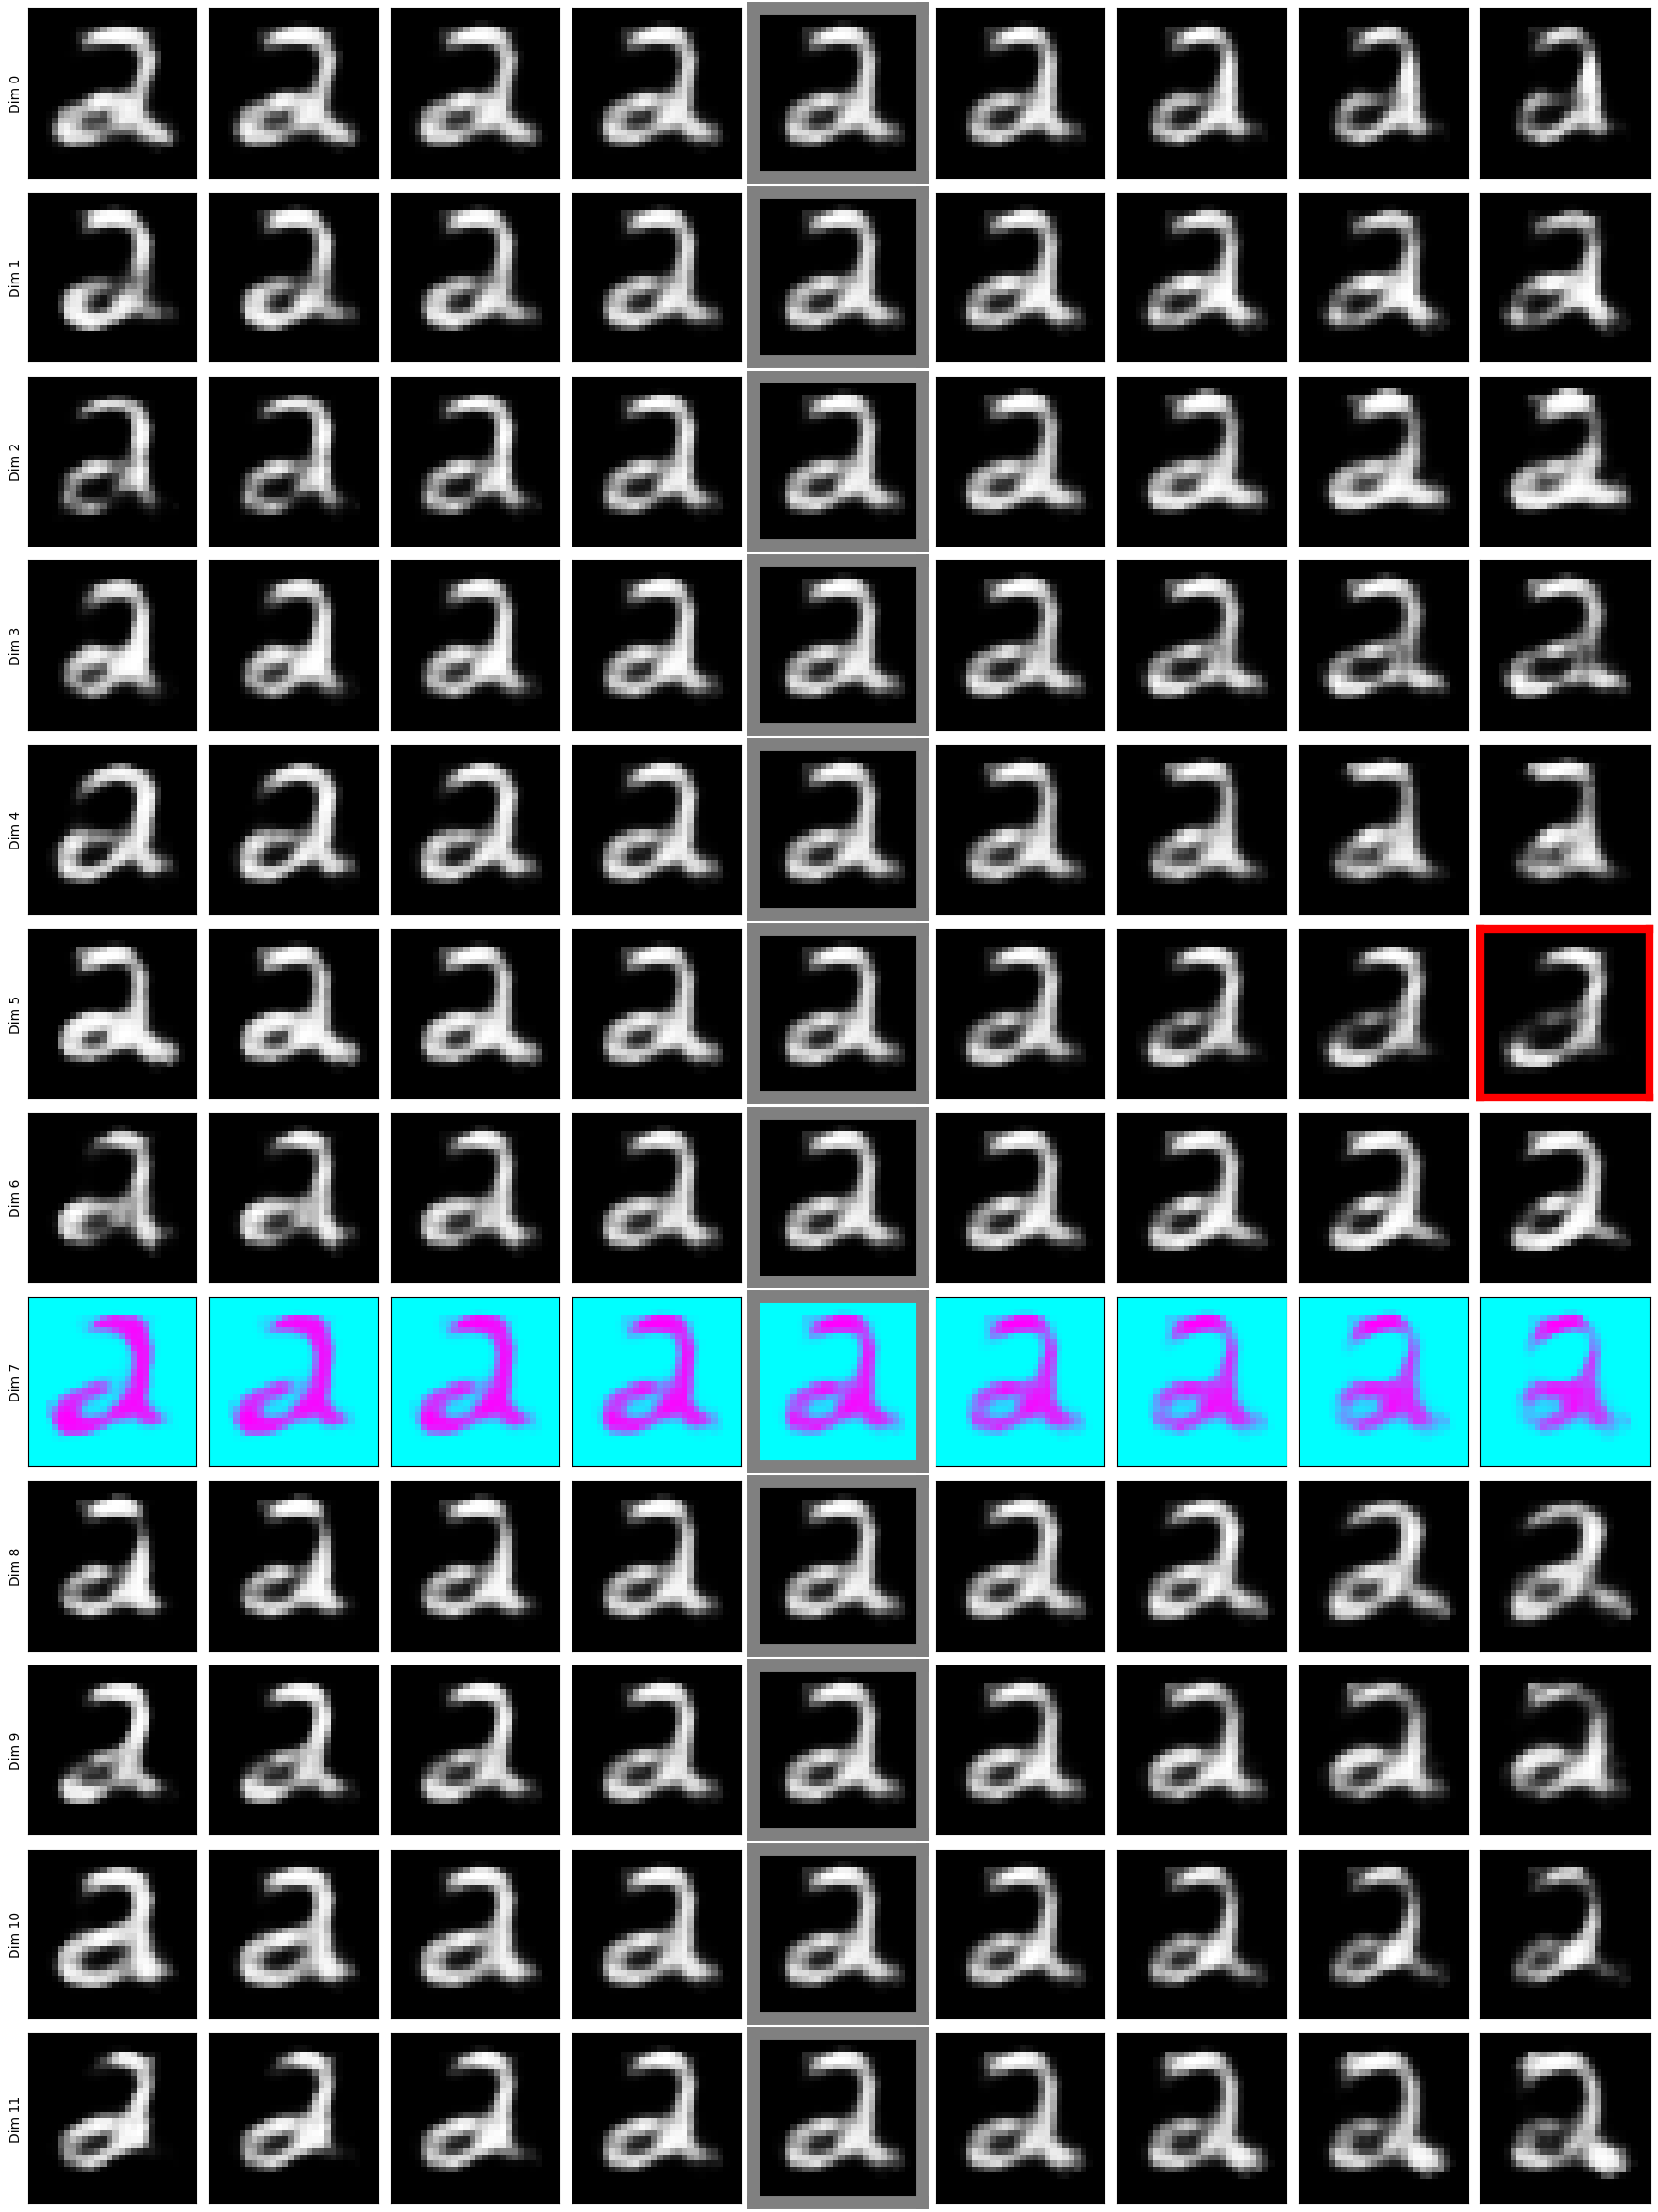

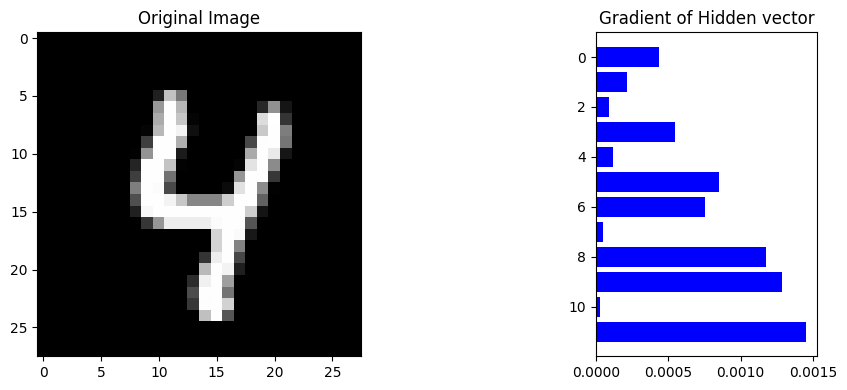

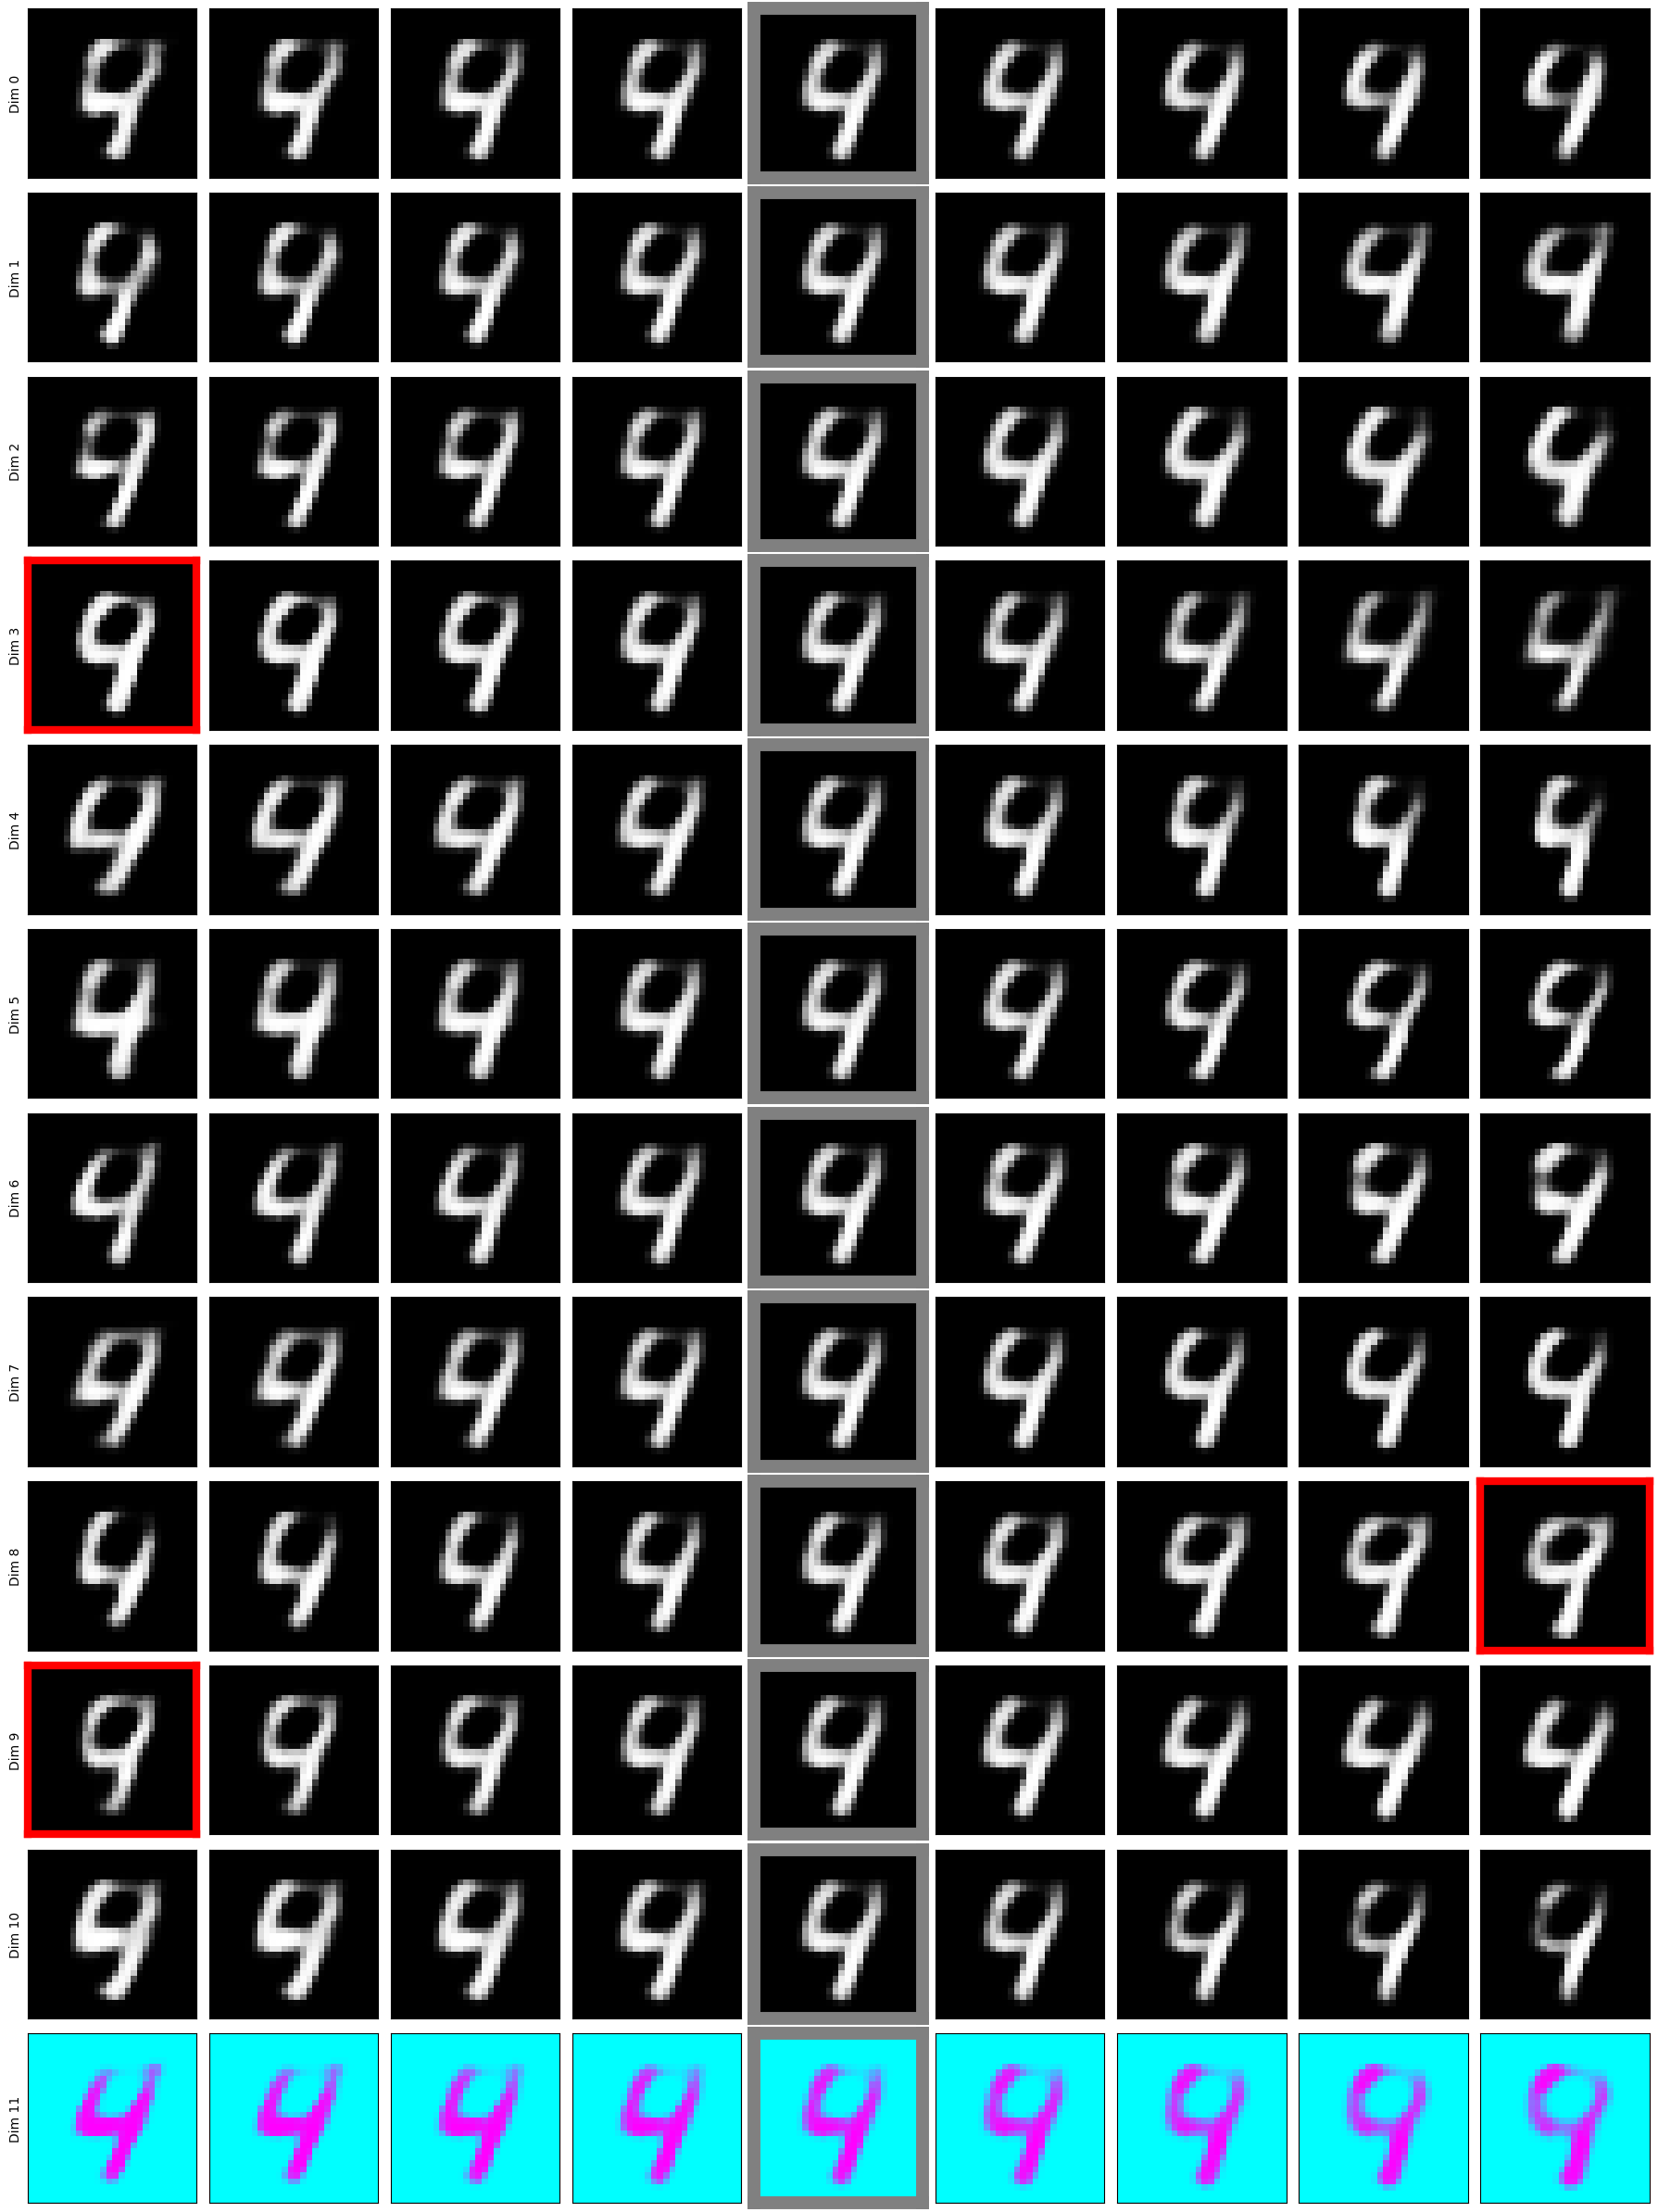

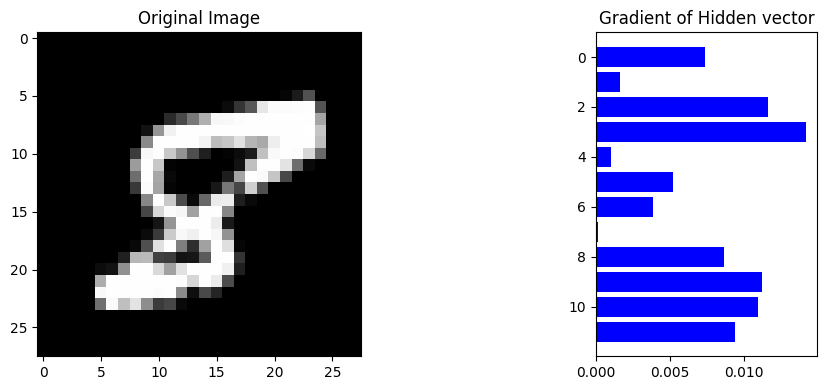

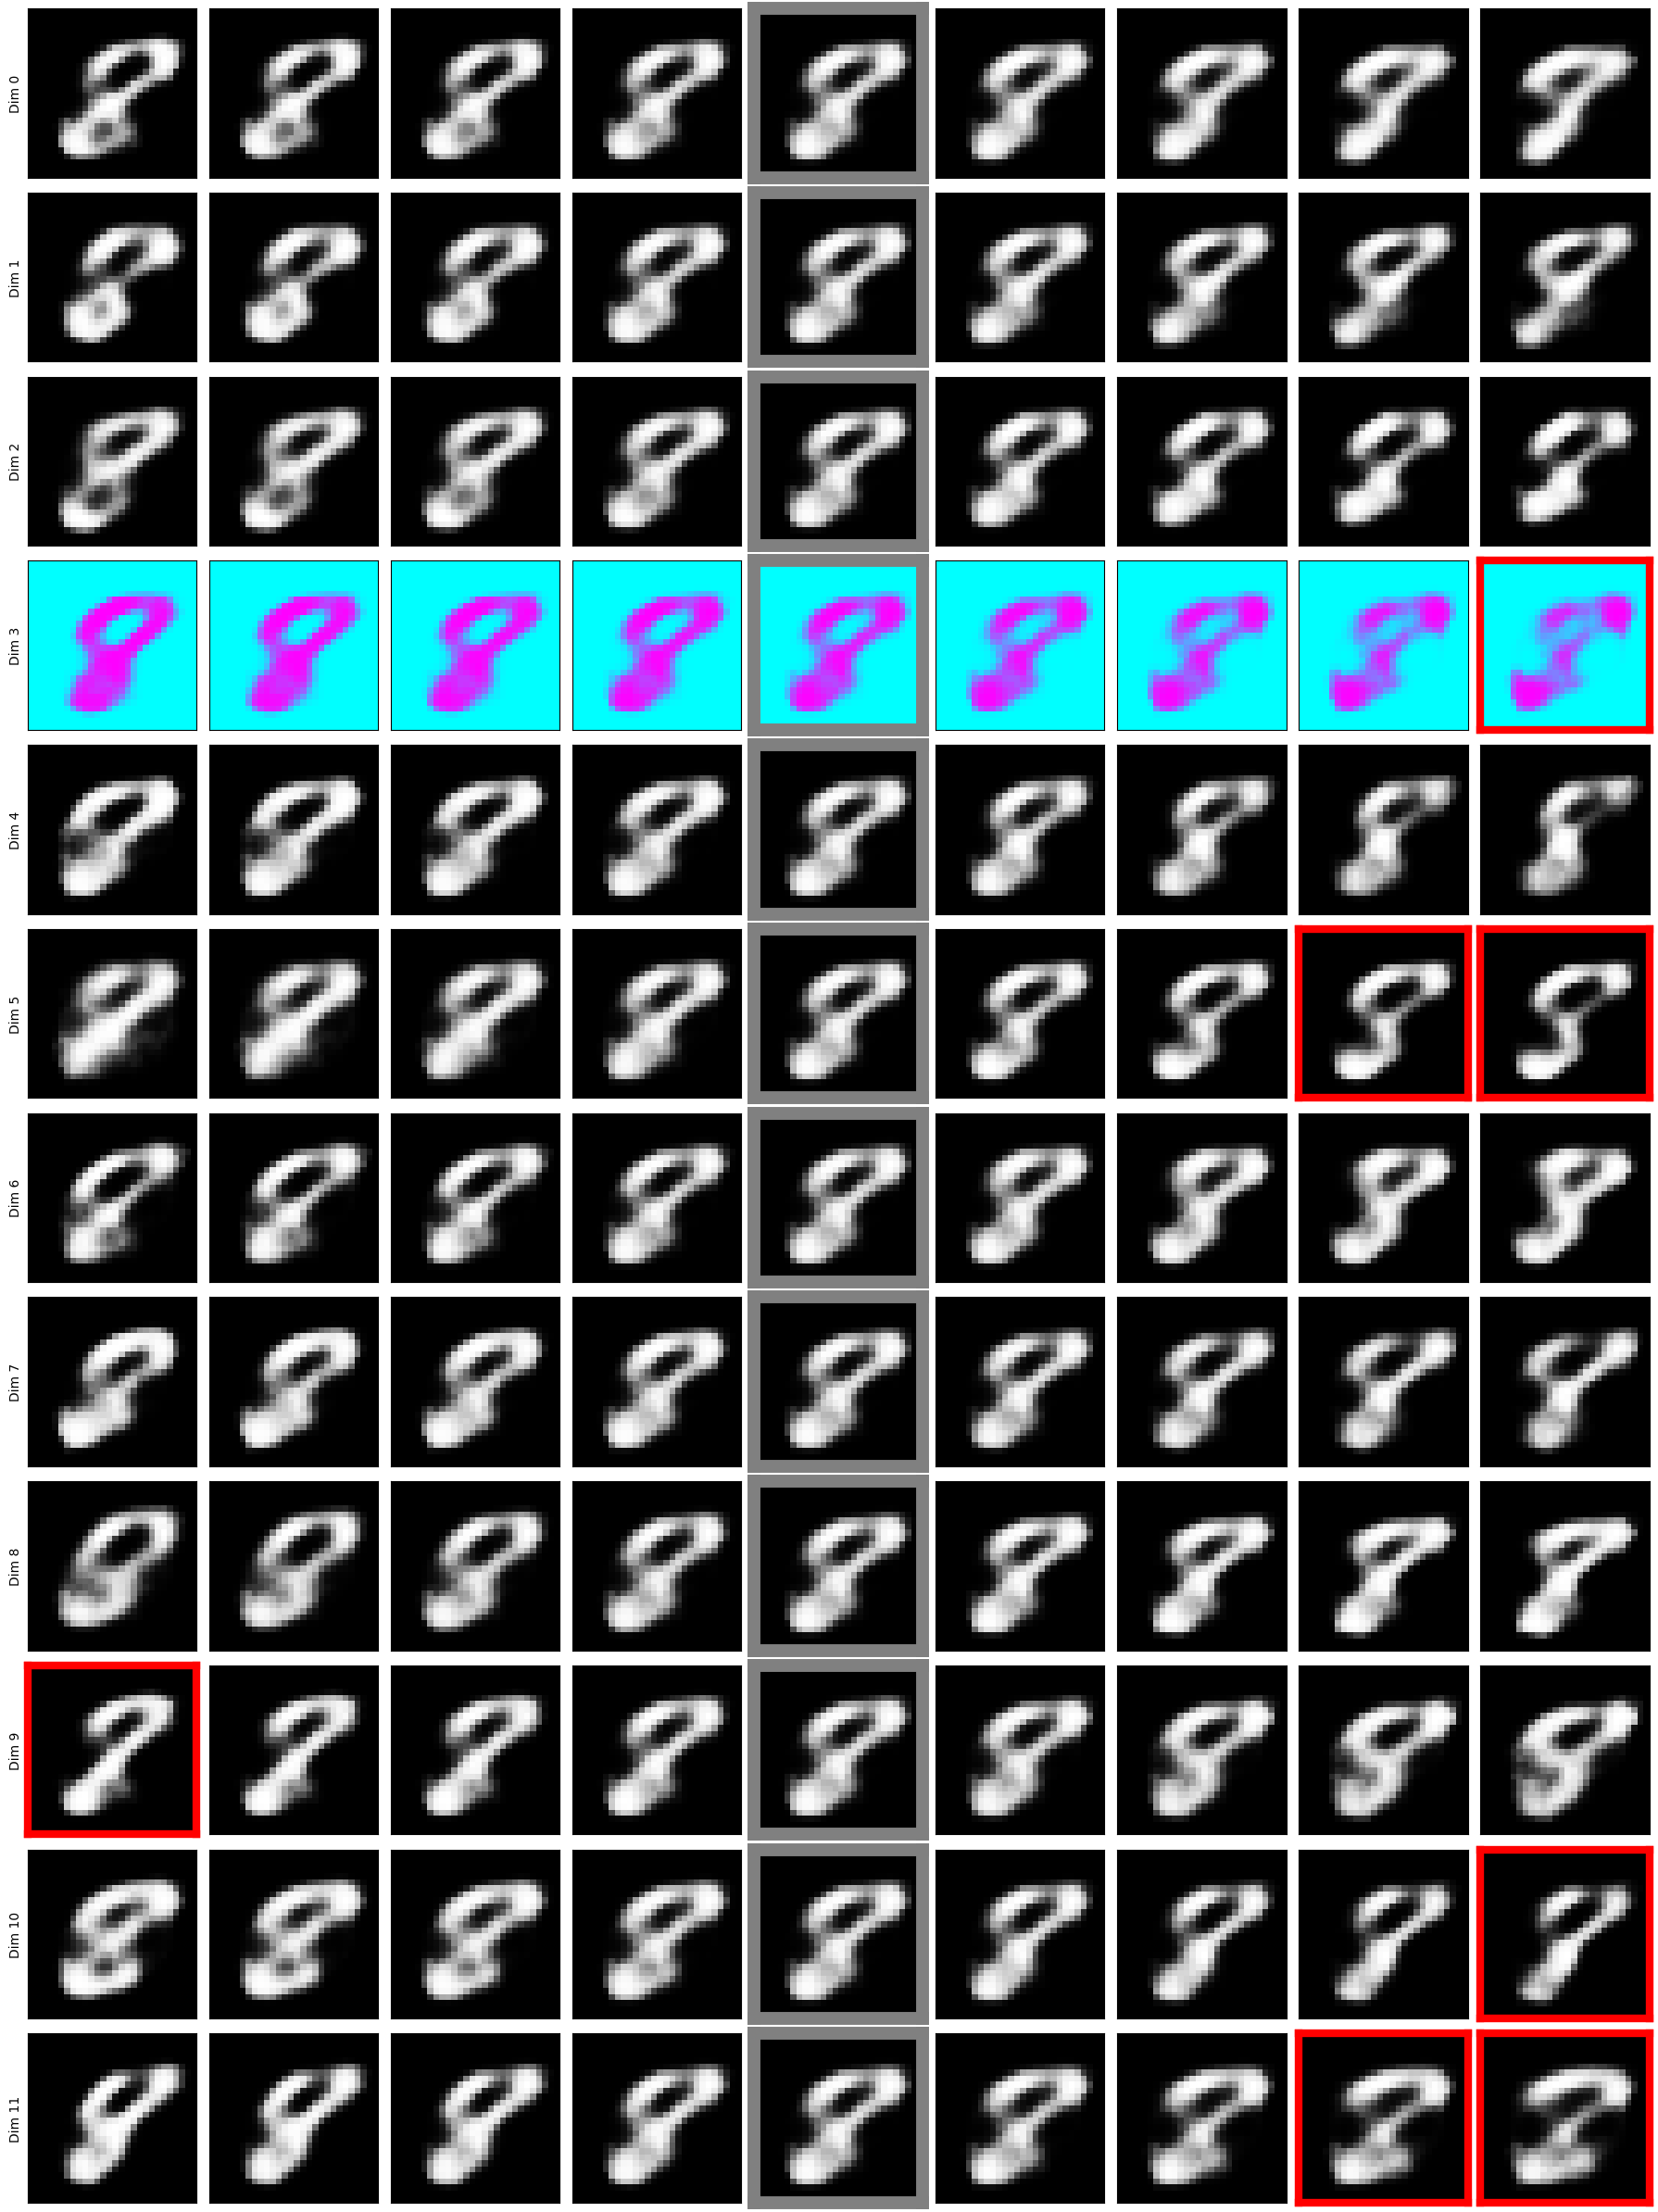

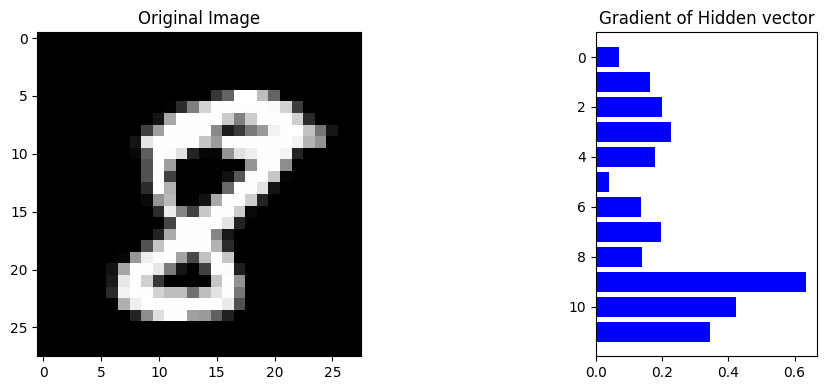

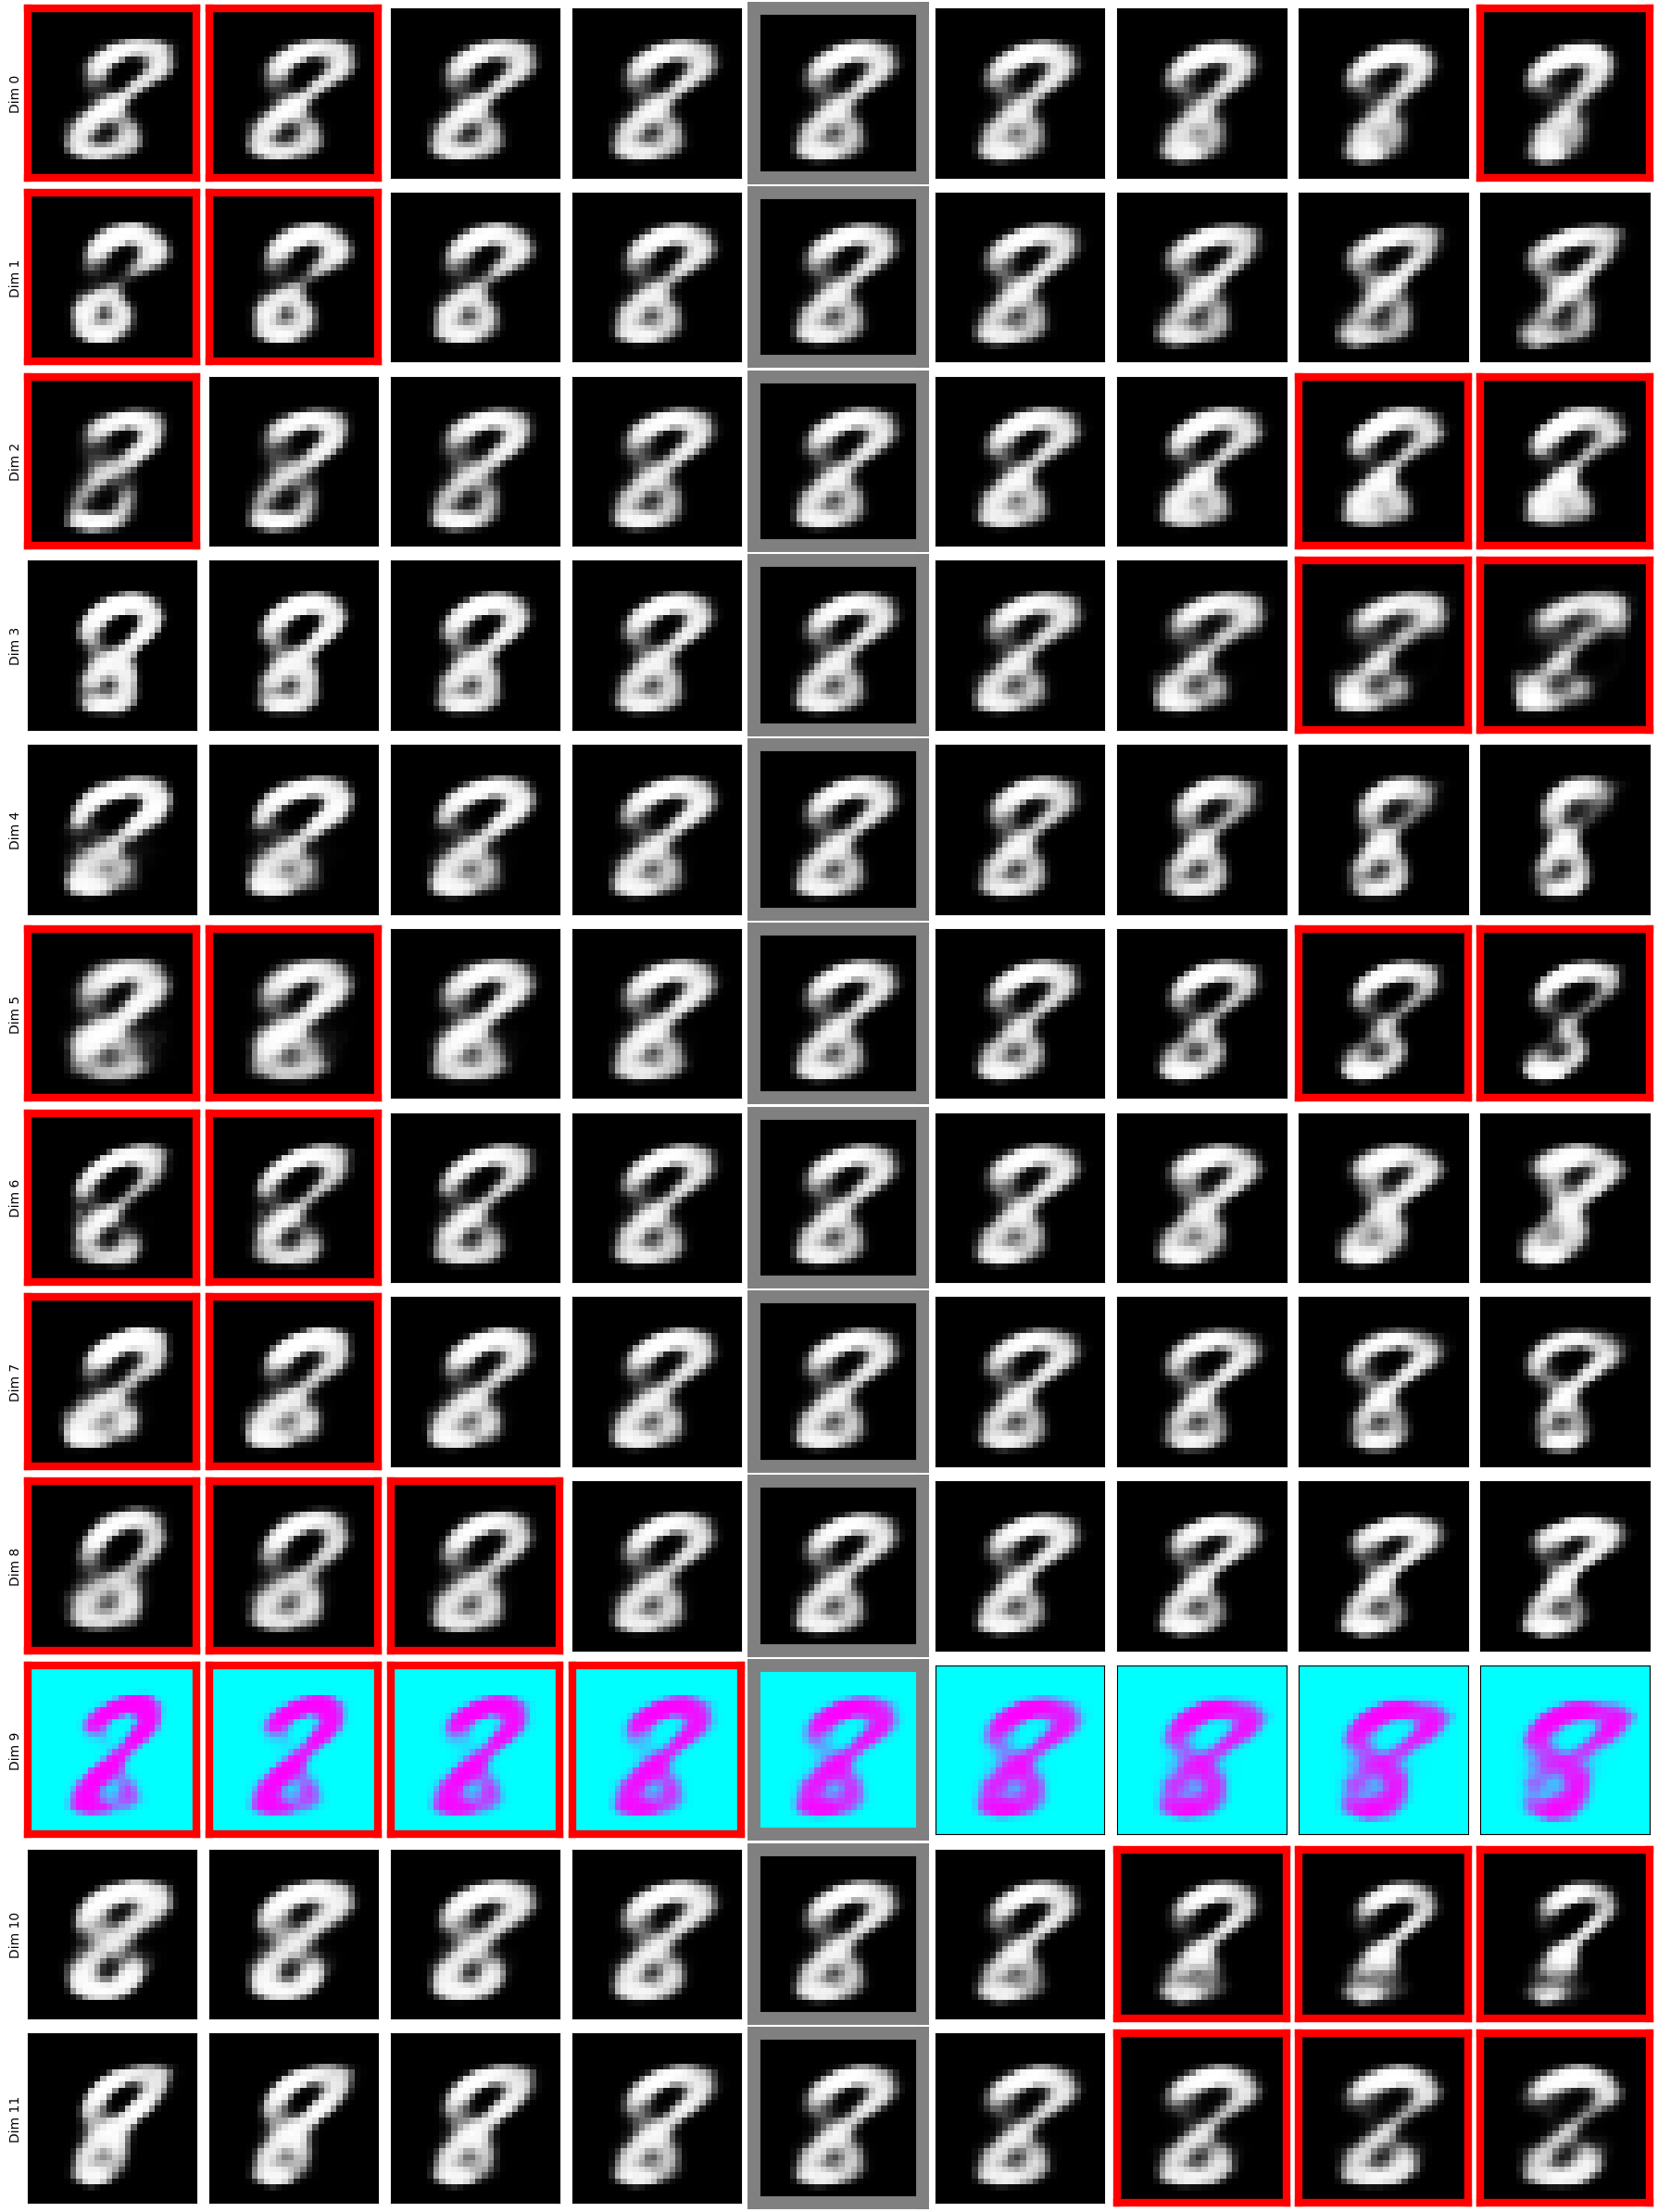

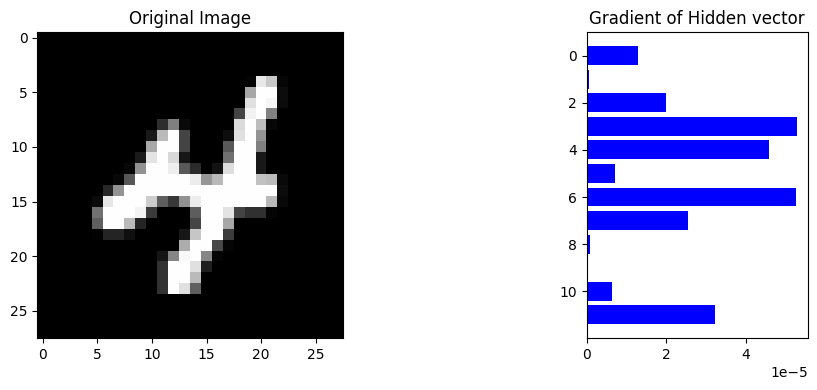

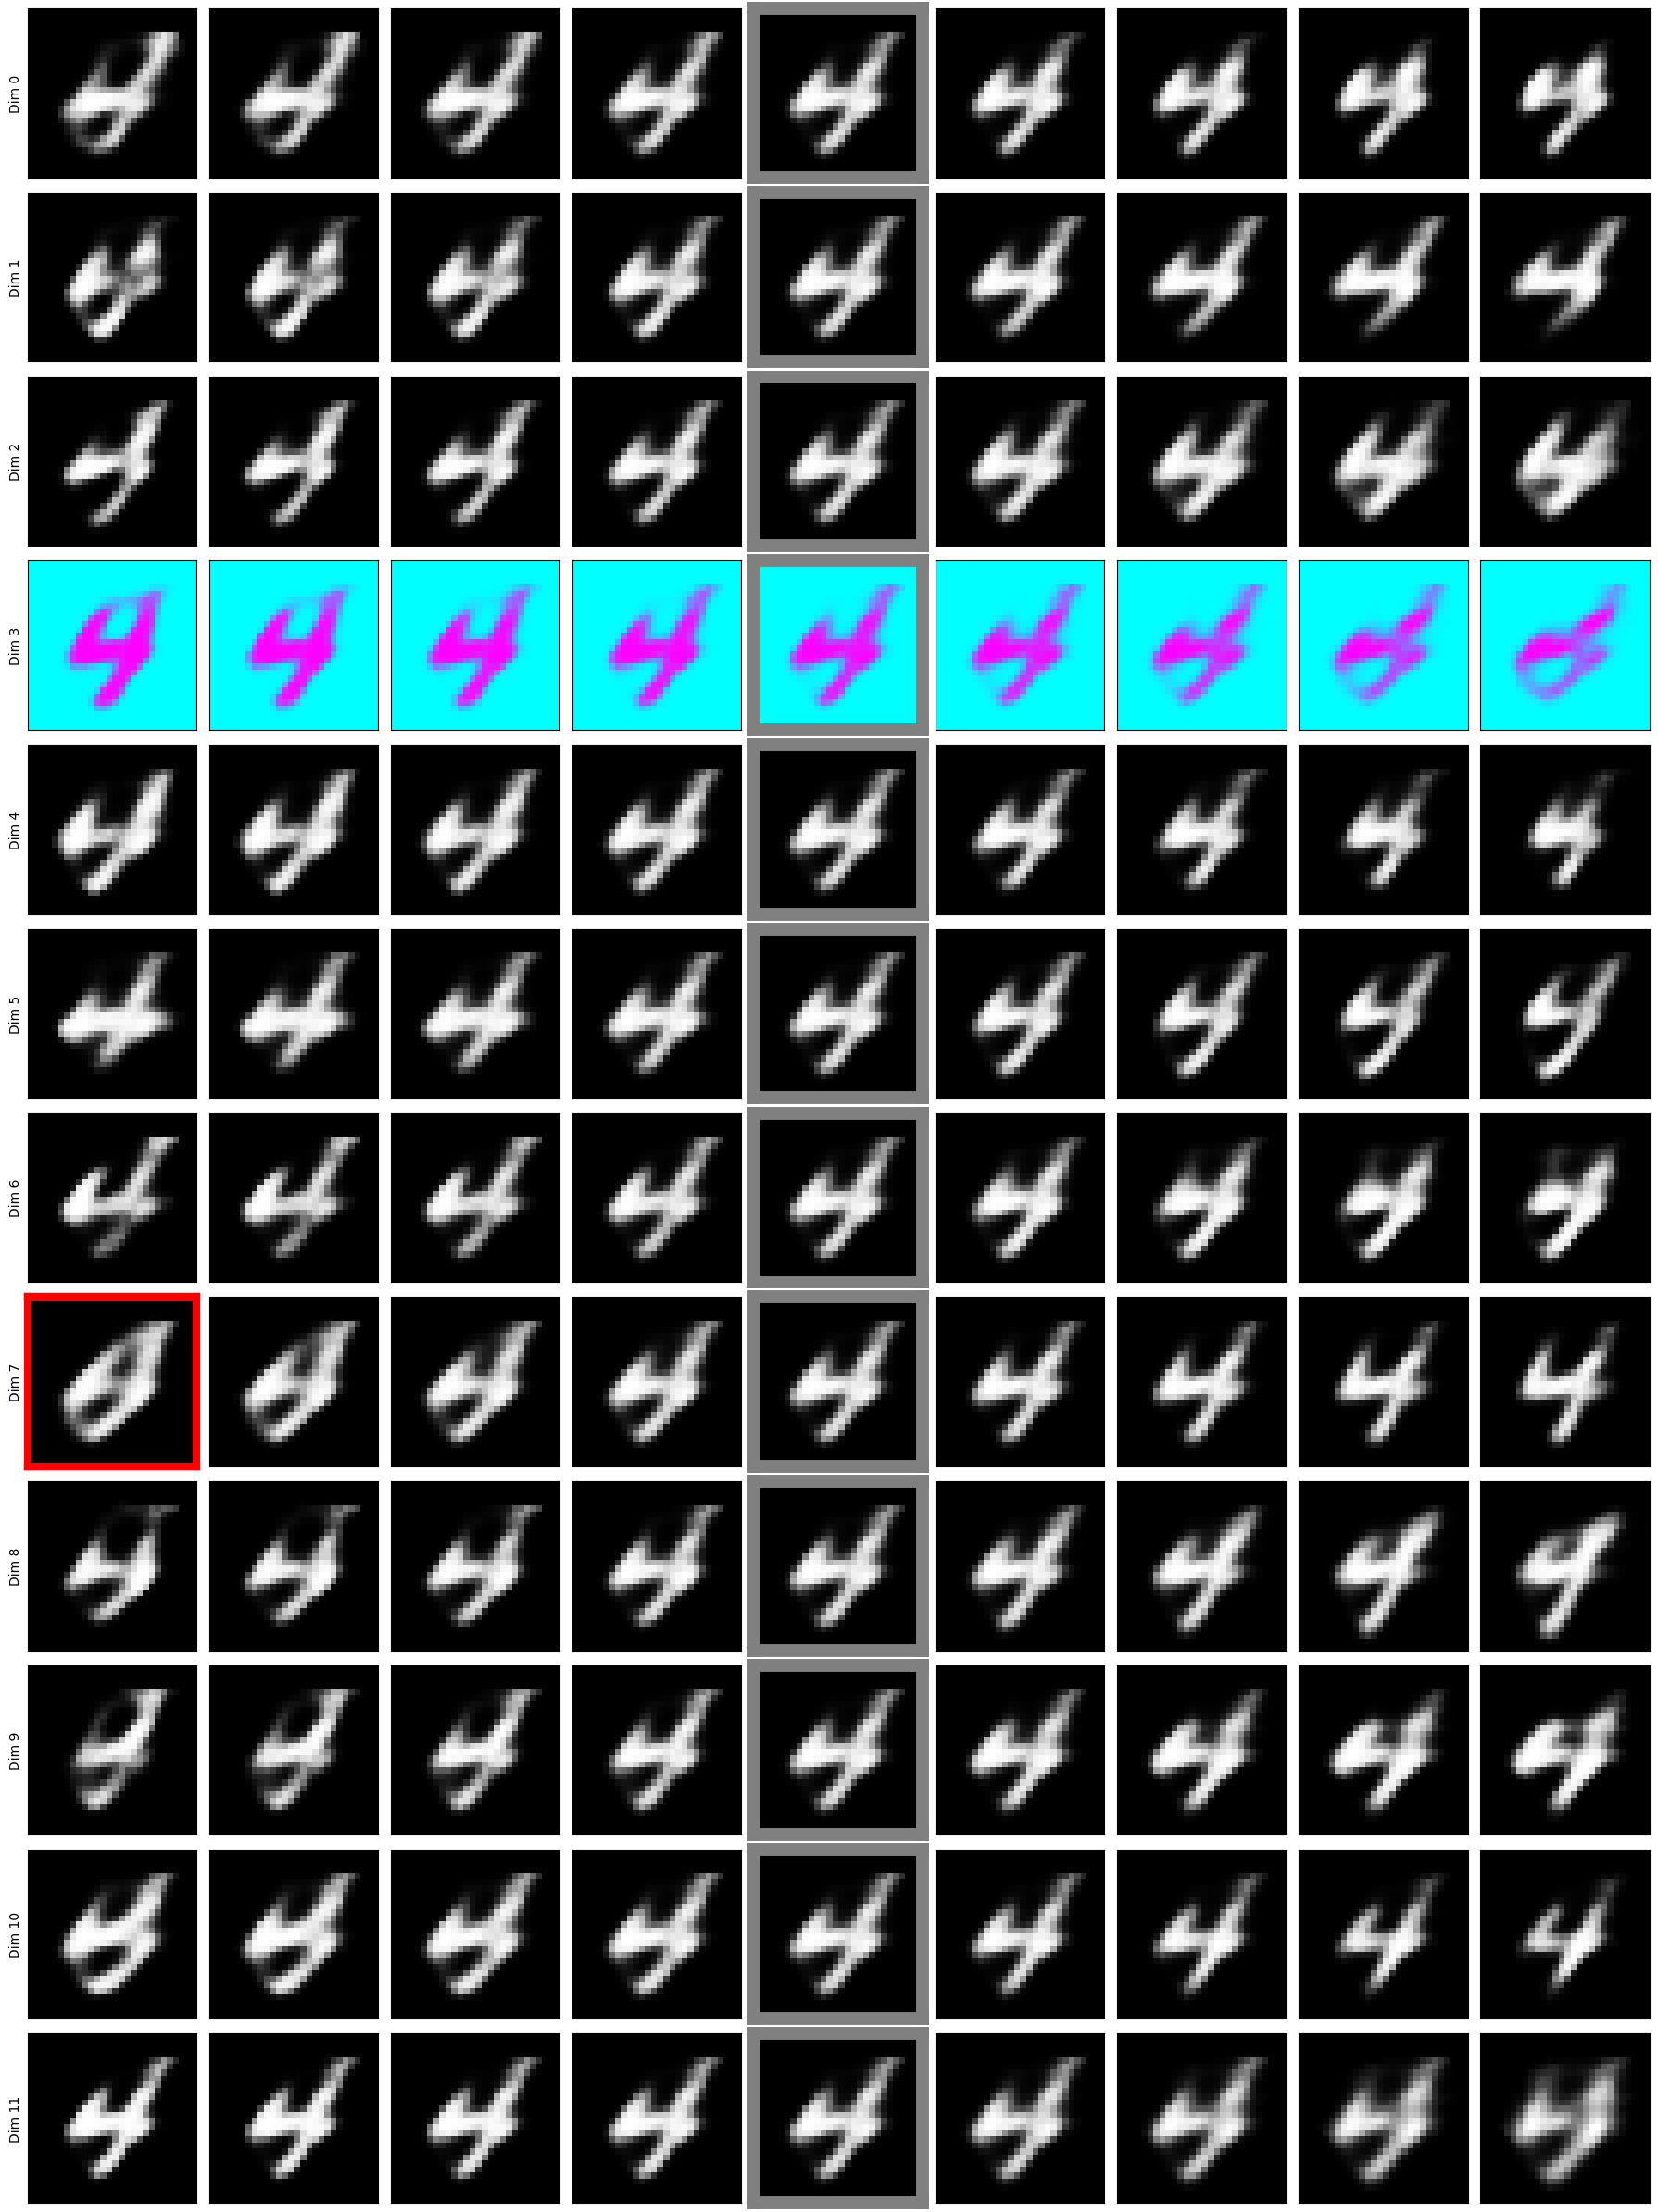

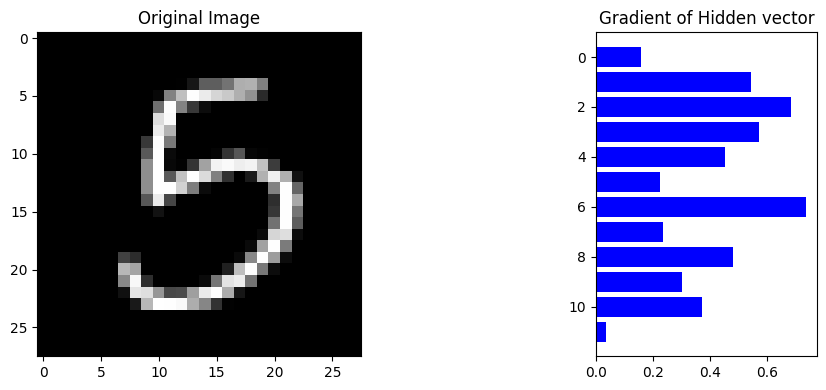

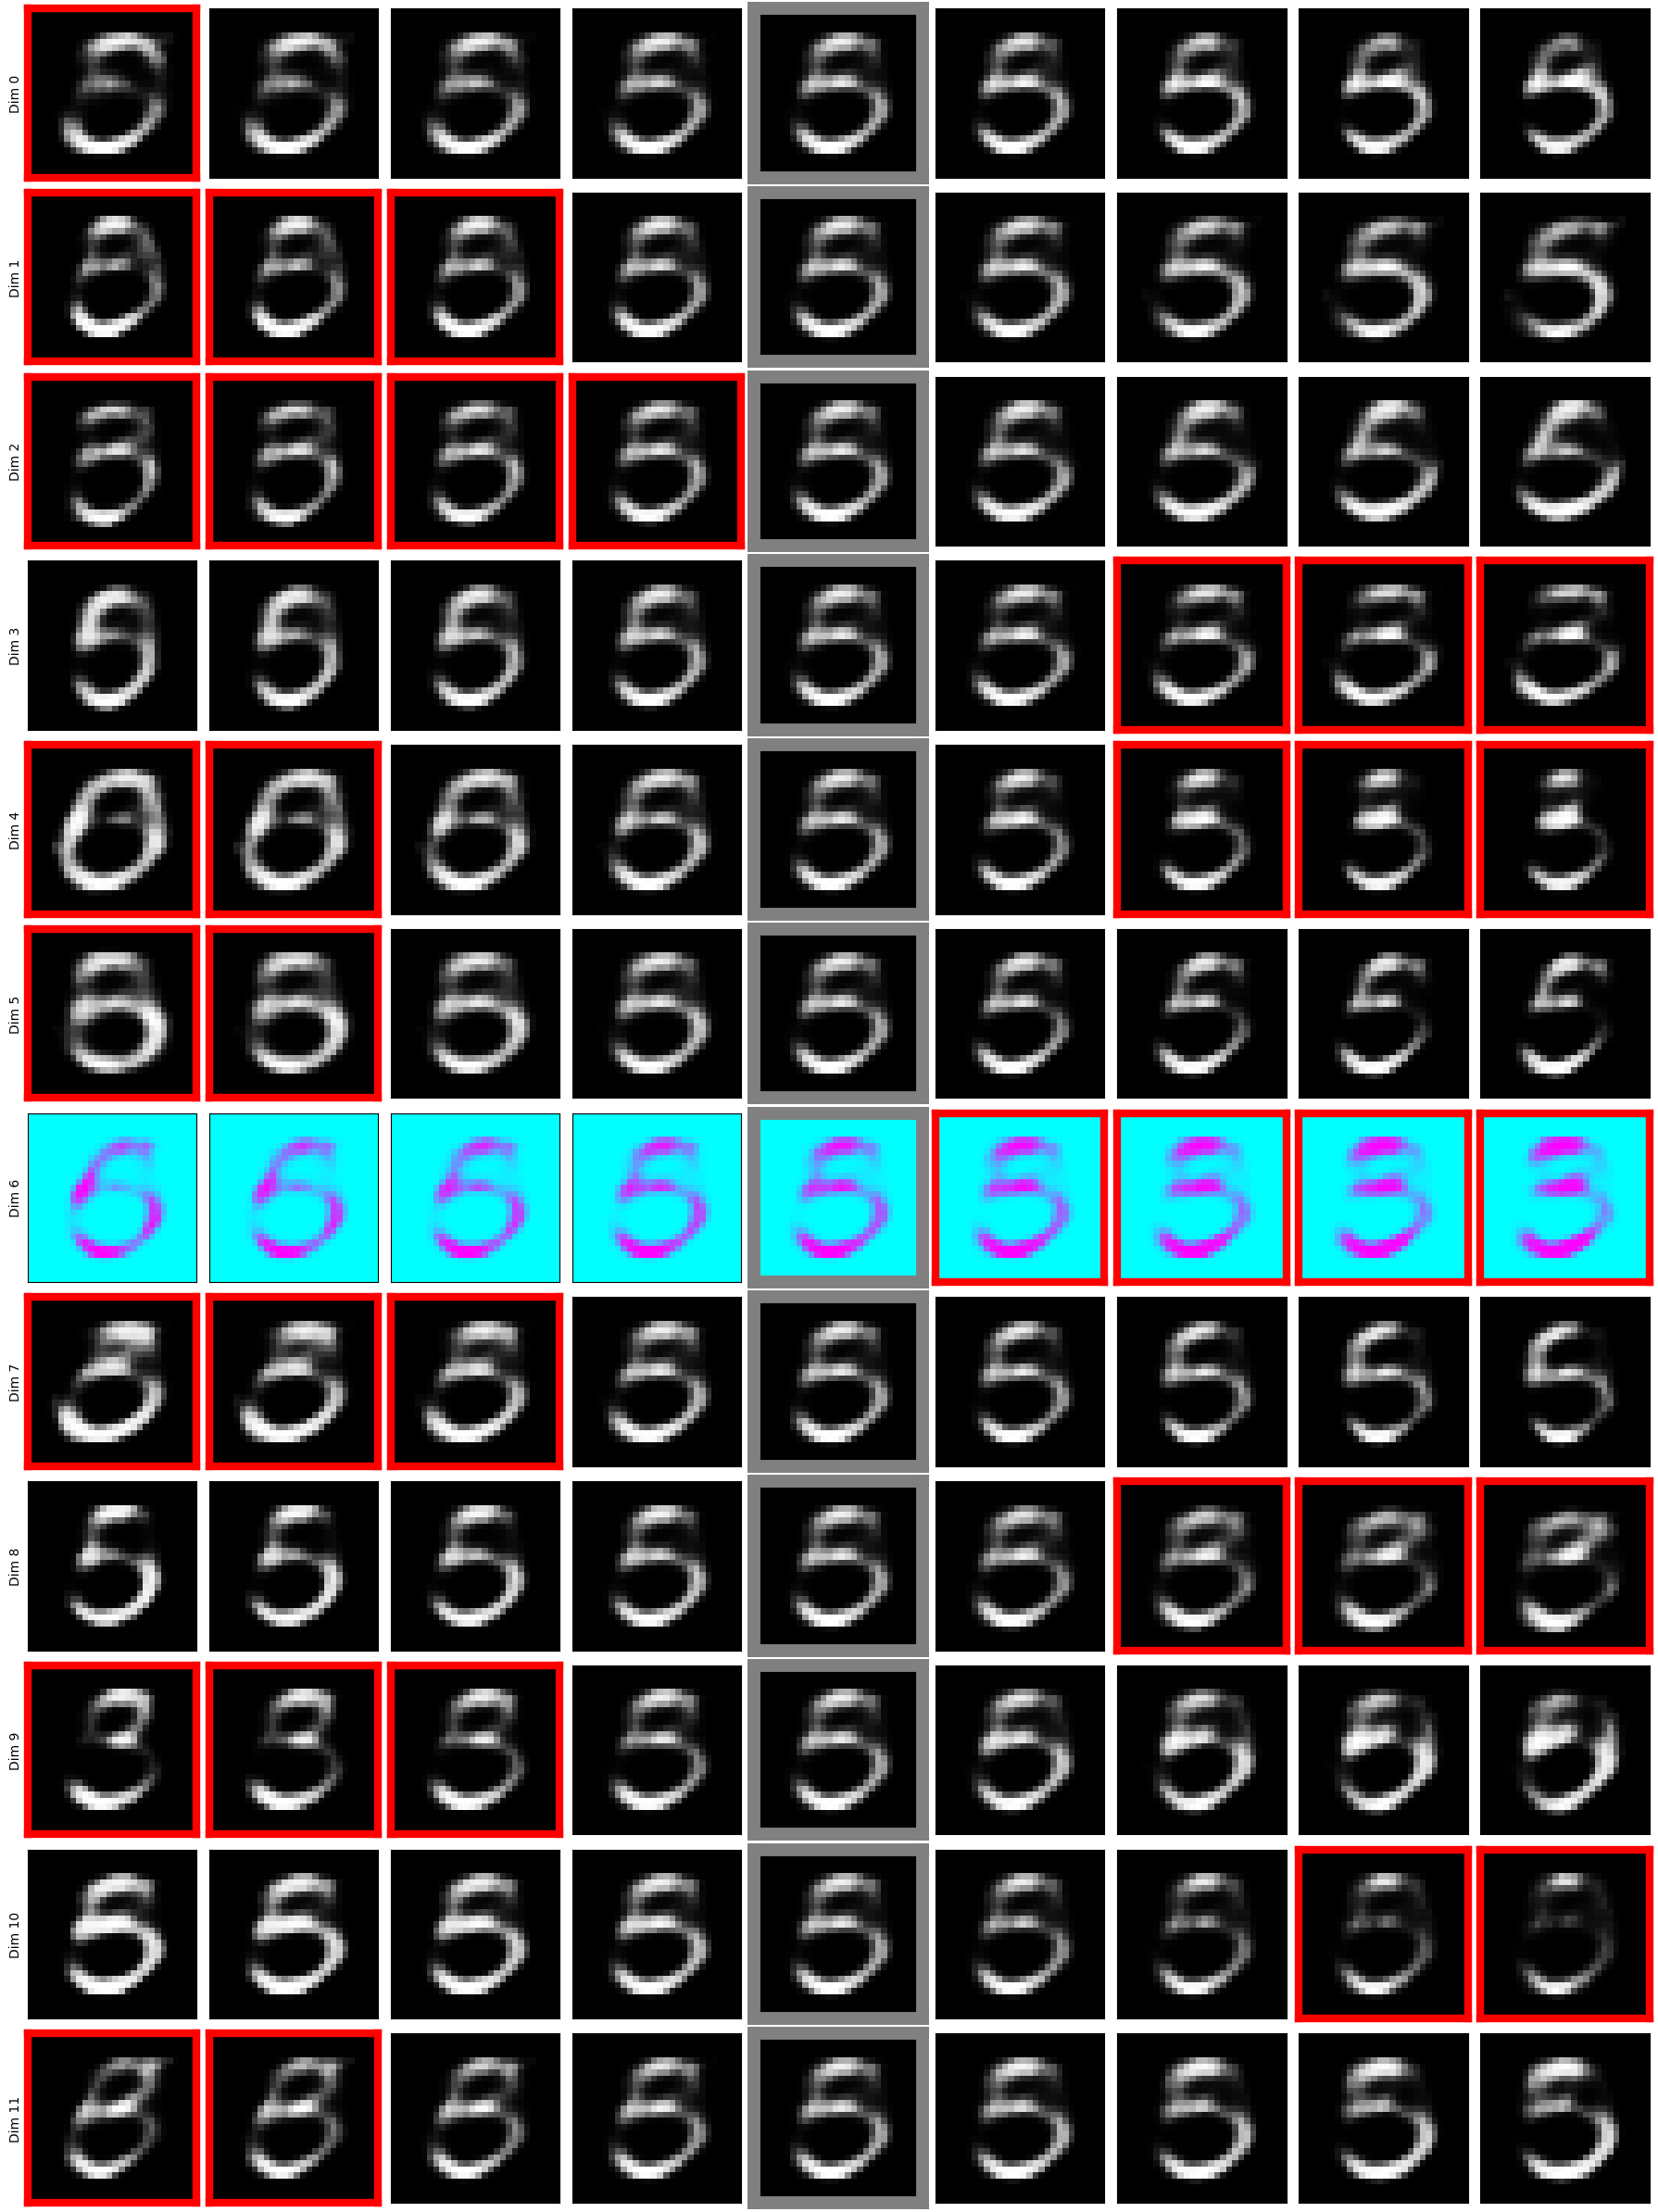

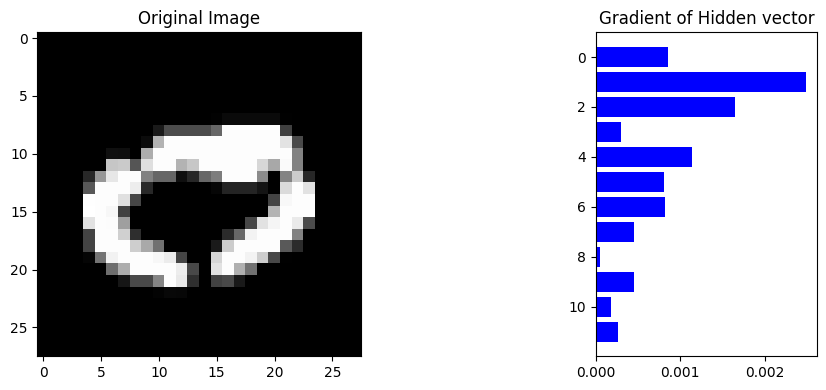

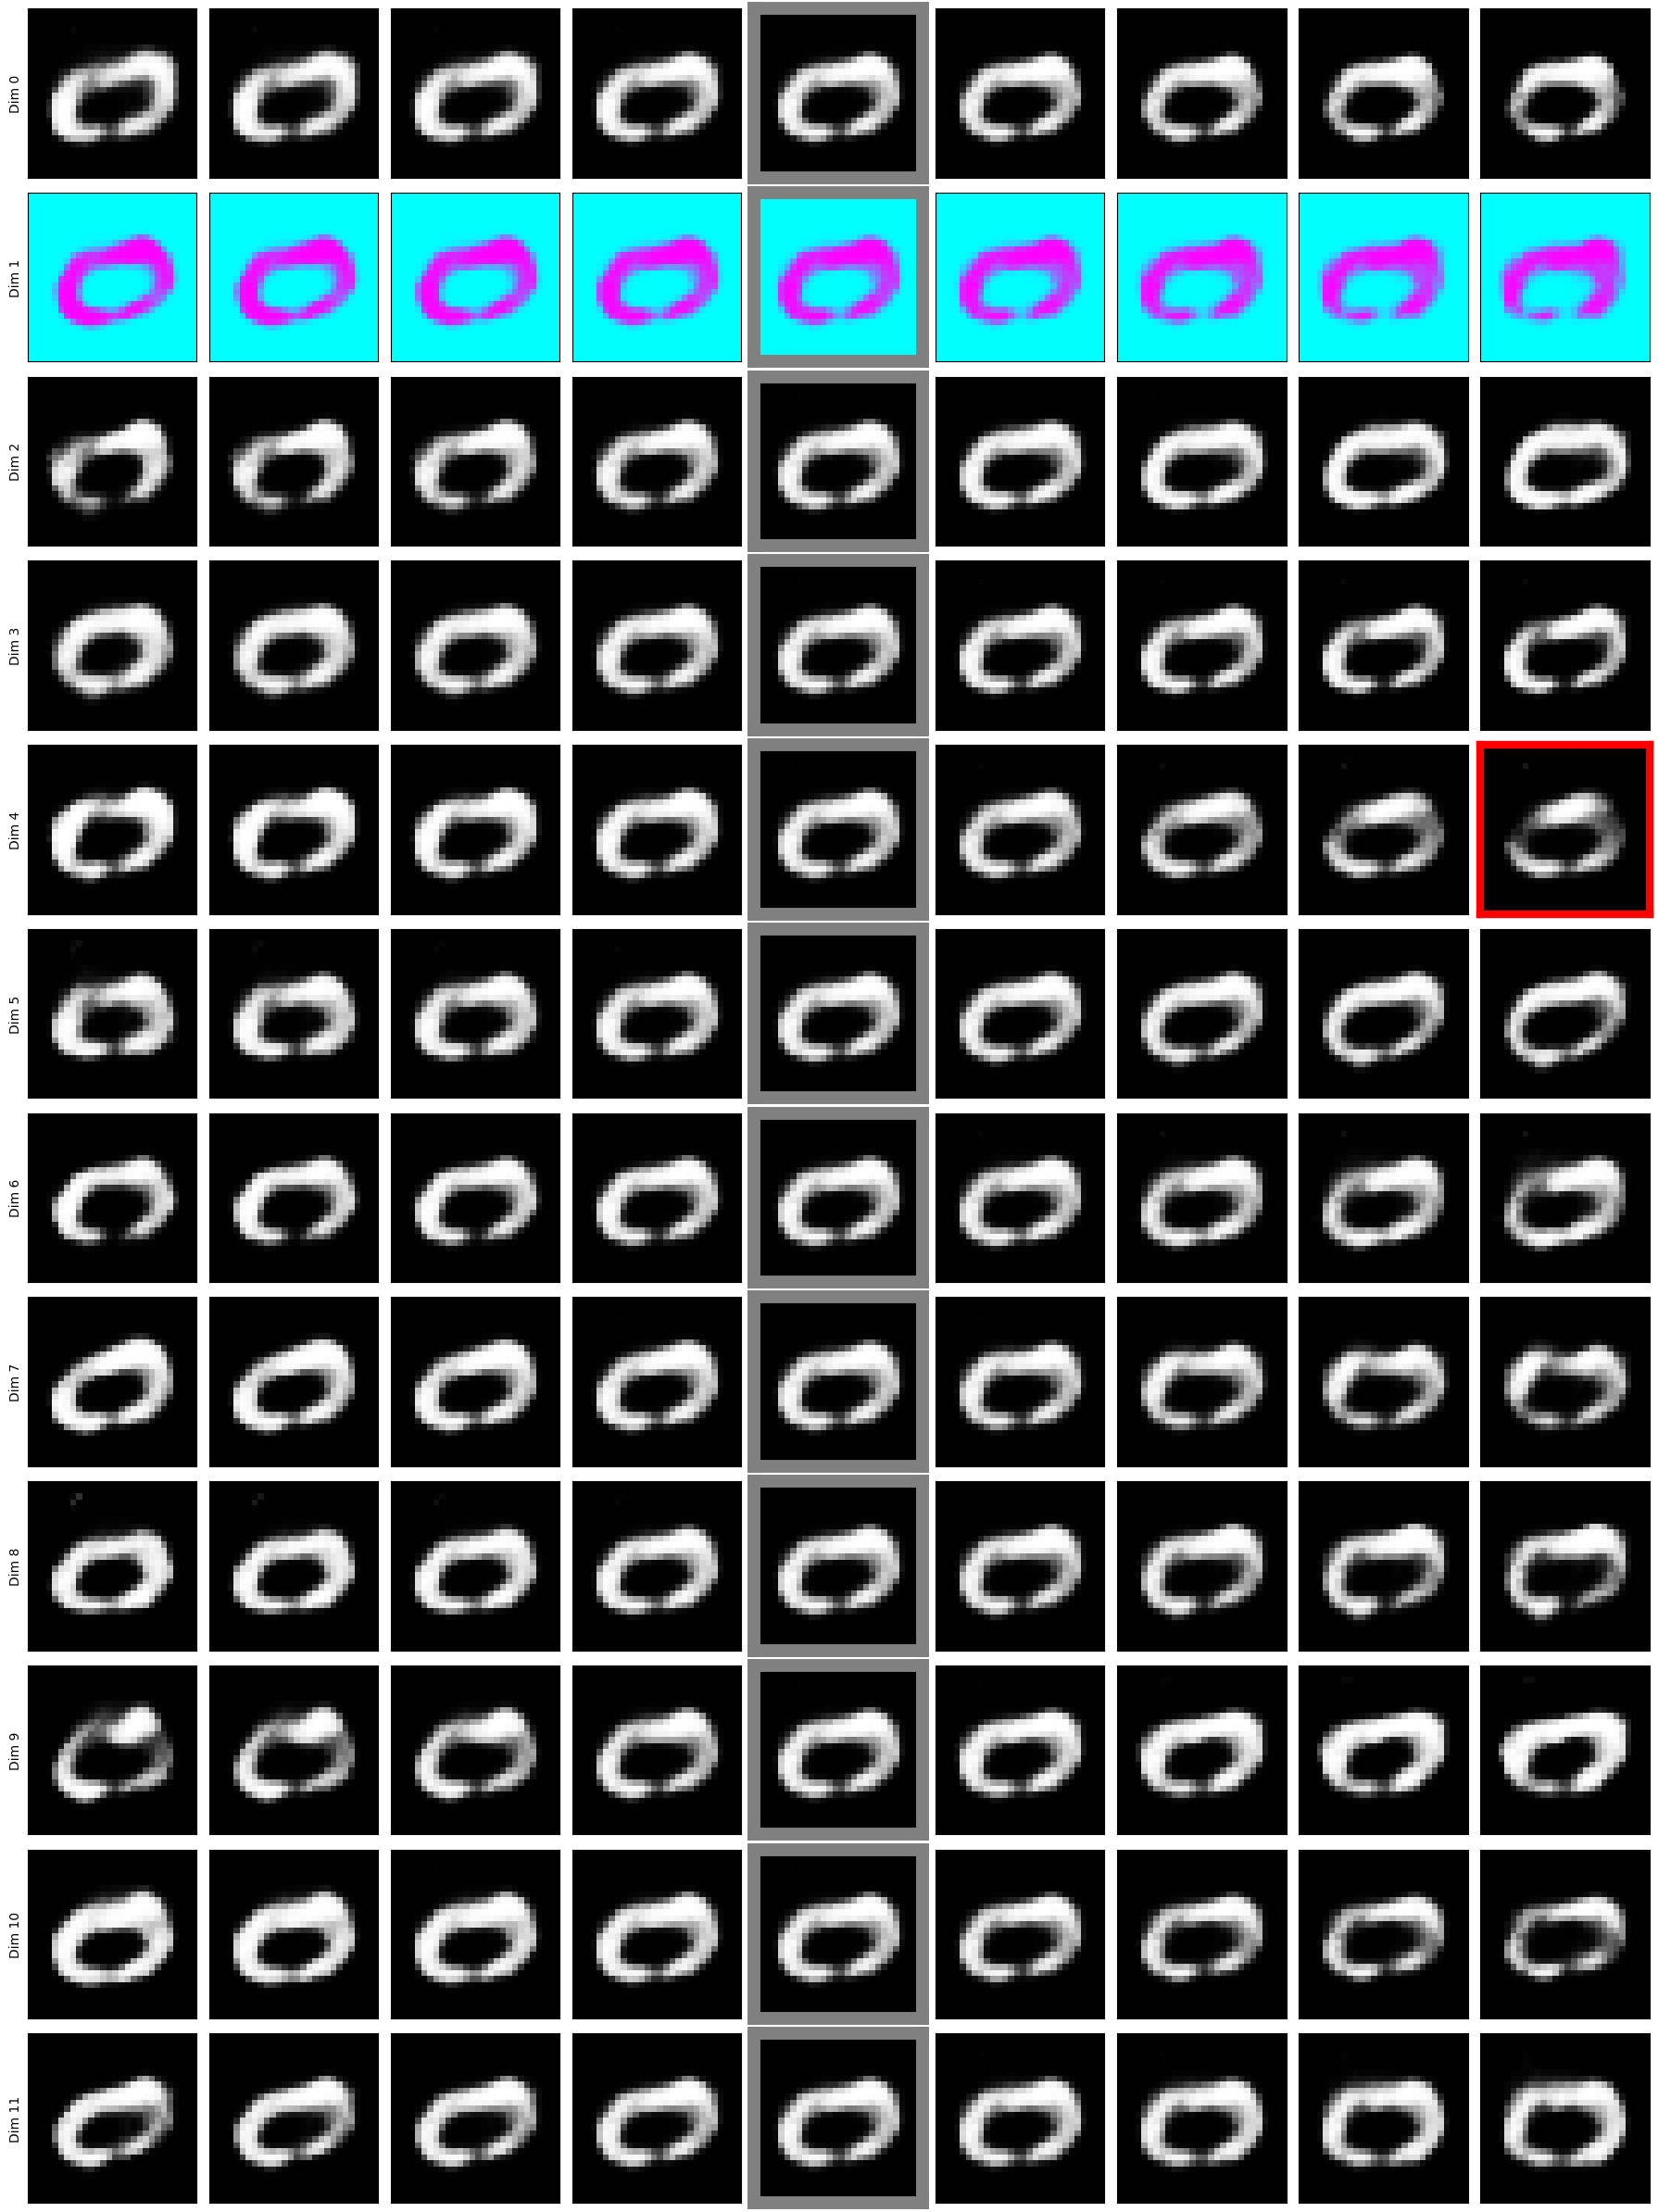

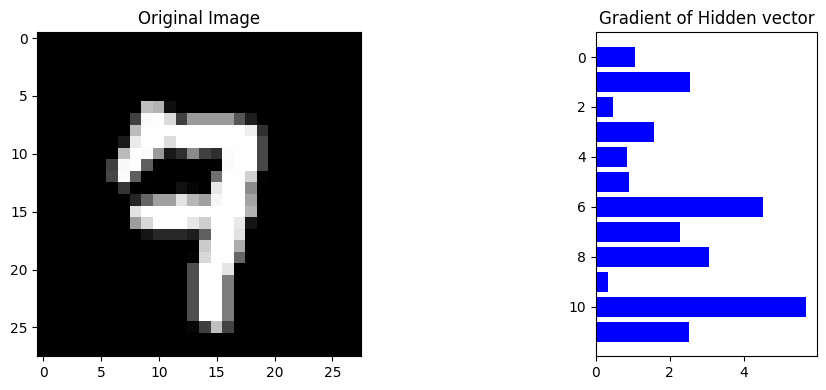

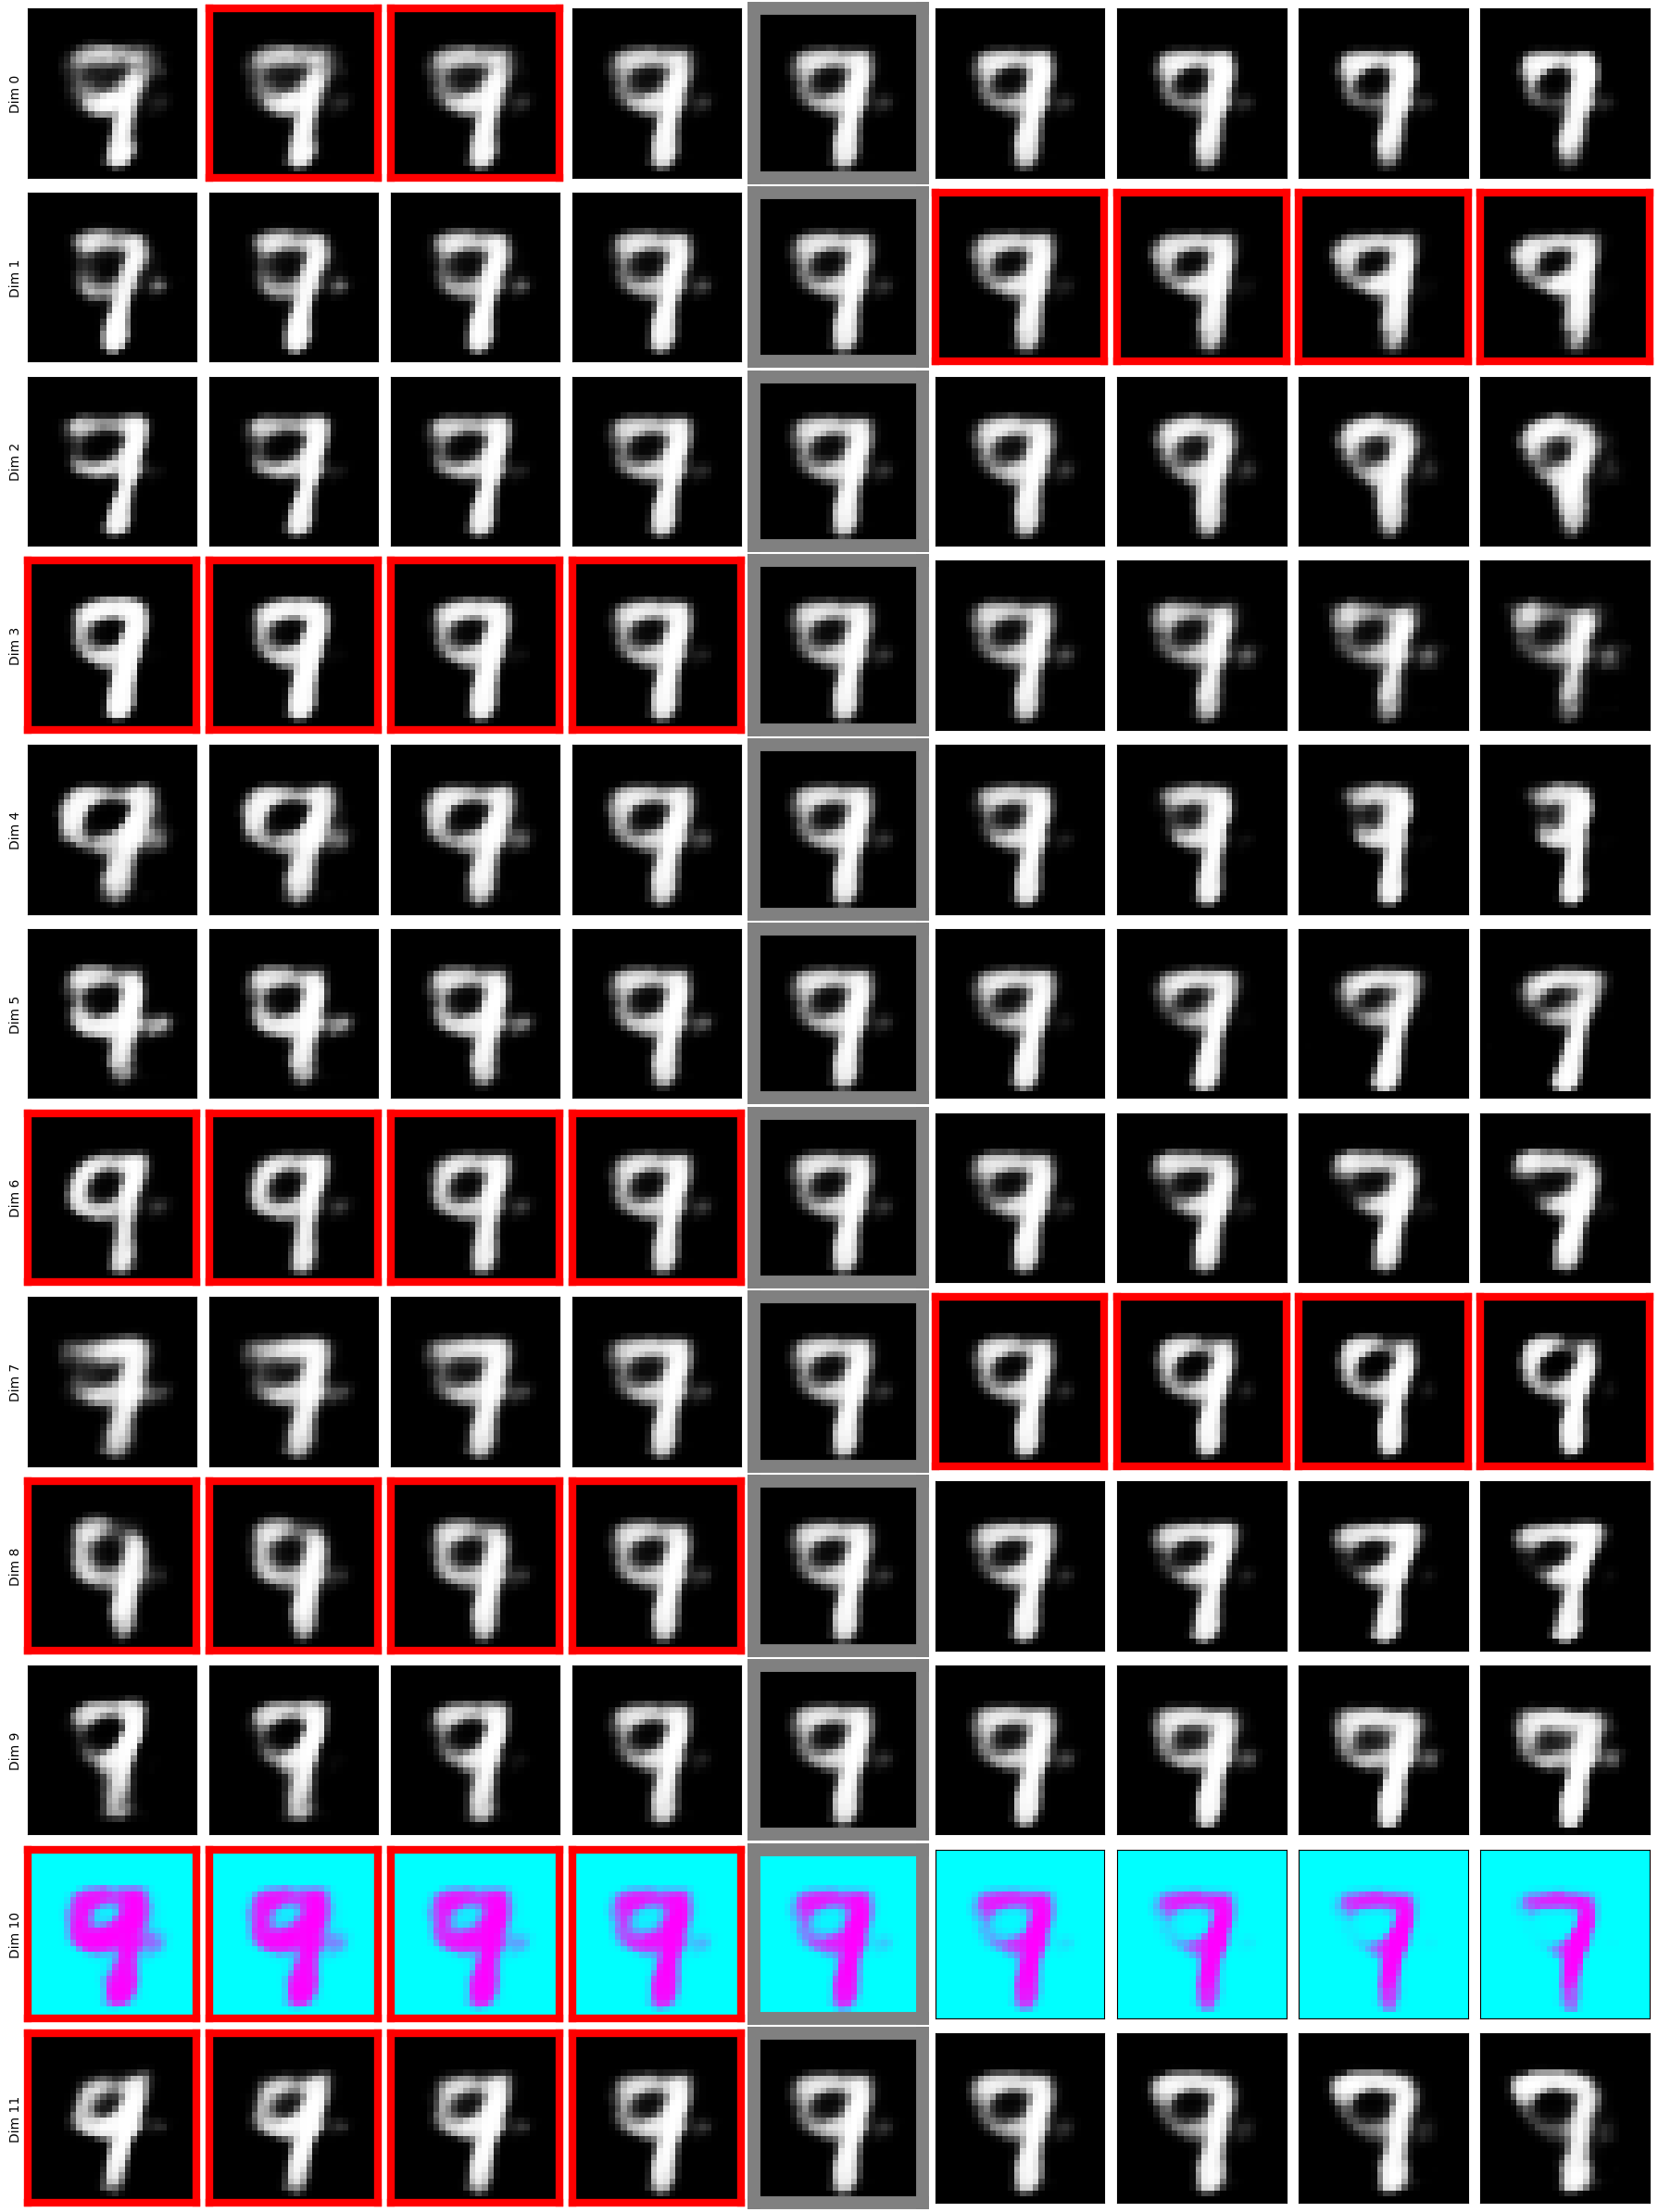

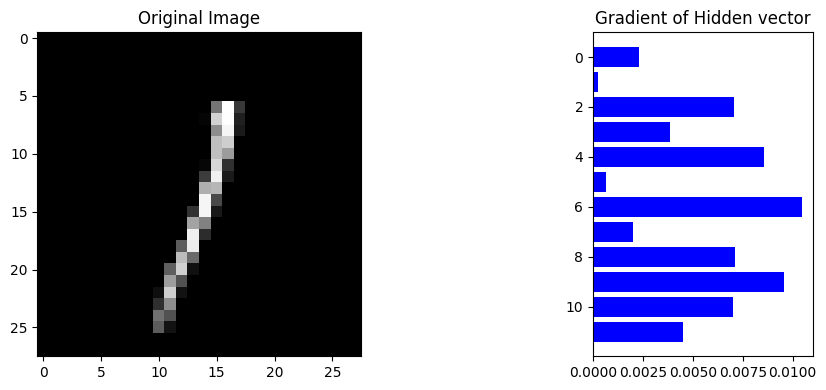

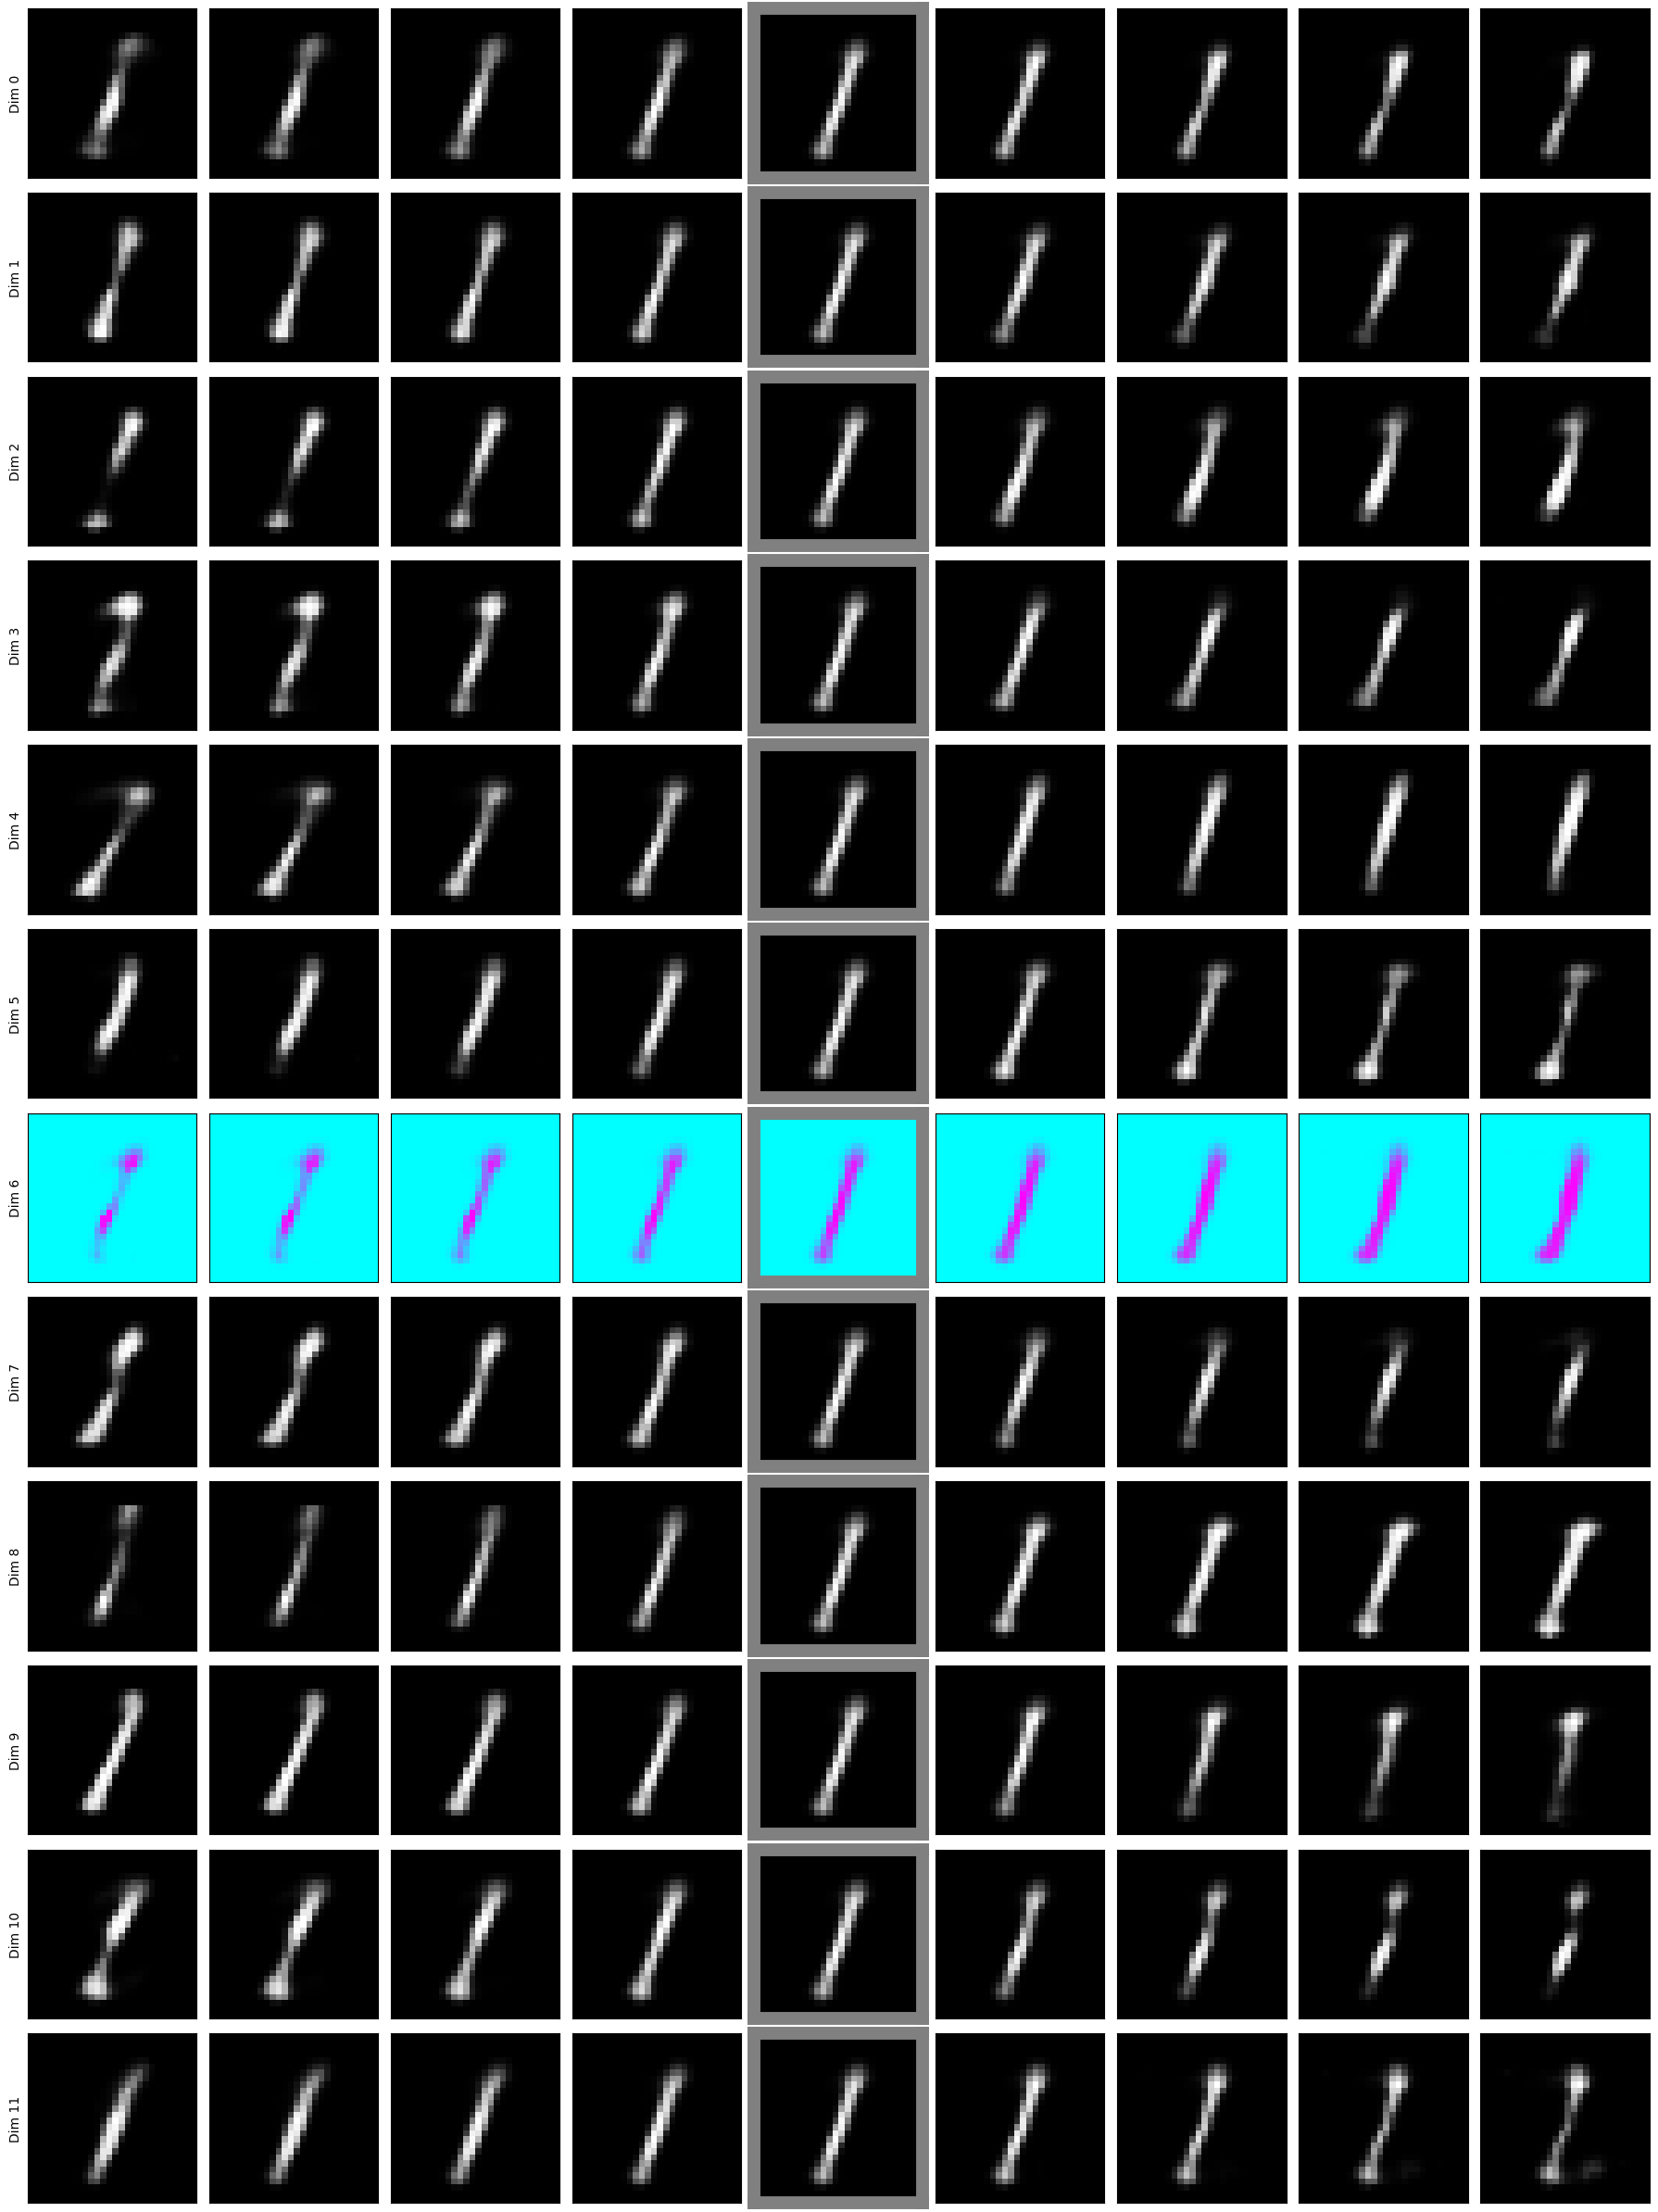

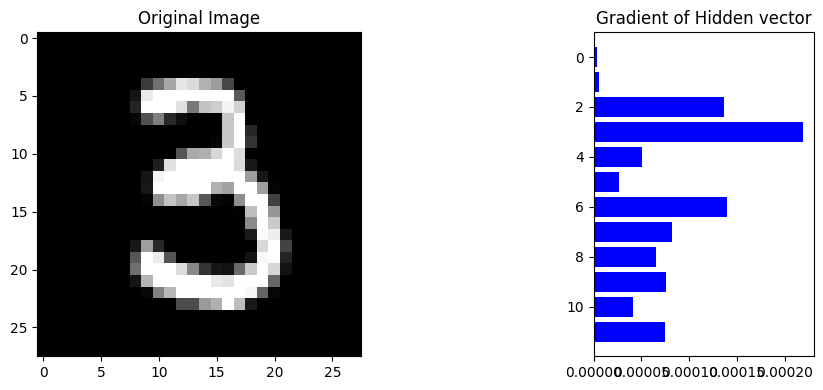

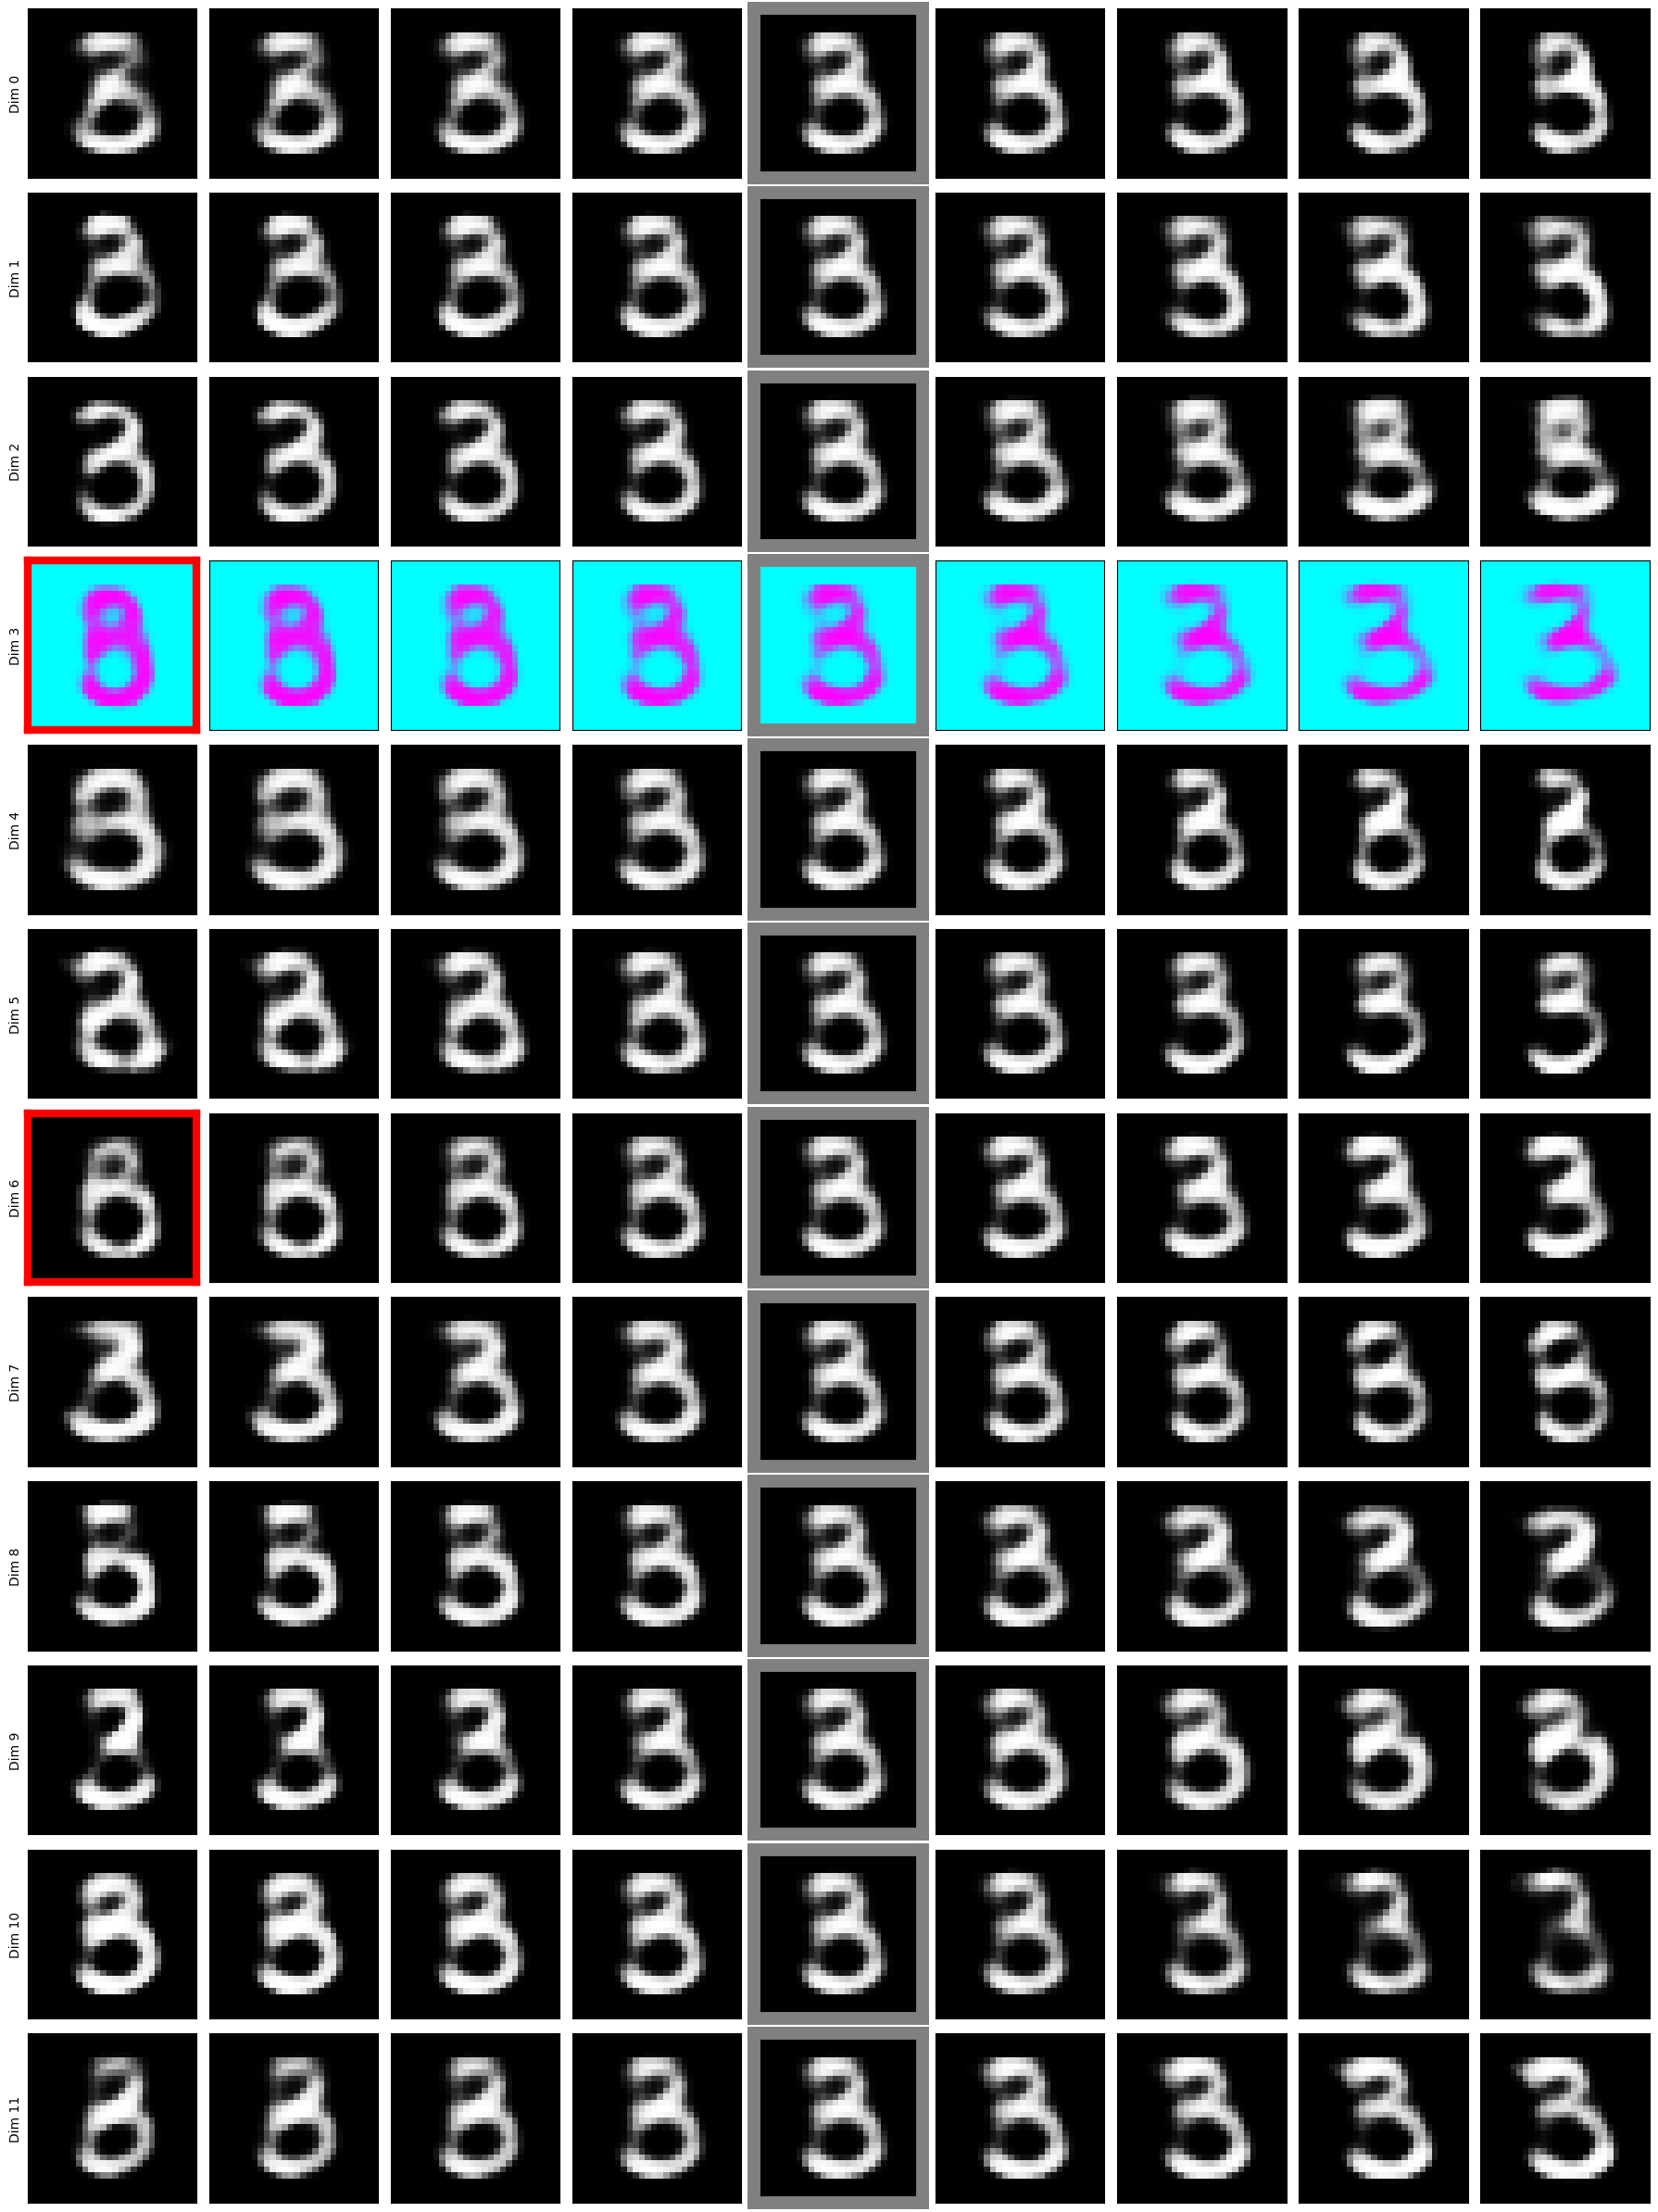

In [21]:
    count = 10
    for i in range(len(x_samples)):
        x = np.array([encodings_samples[i]])
        y = np.array([sample_labels_onehot[i]])
        g = gradient_of_x(x, y, xai)

        g_abs = np.abs(np.squeeze(g.numpy()))
        plot_image_and_gradient(np.reshape(x_samples[i], (28, 28)), g_abs)


        # Identify the maximum gradient entry
        max_grad_index = np.argmax(g_abs)
        # latent_space_display(x, vae.decoder, highlight_dim=max_grad_index)
        latent_space_display_mark(x, sample_labels[i], vae.decoder, xai, highlight_dim=max_grad_index)

        if count <= 0:
            break
        count -= 1